<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2025/blob/main/Lections/L03_kNN_regressor_LinLogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы машинного обучения

## Лекция 3

### Задача регрессии. KNN-Regressor. Линейная регрессия. Регуляризация. Ridge, Lasso. Логистическая регрессия.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")

## Обучение модели

**Обучение** для модели - это итеративное улучшение описания данных моделью с помощью изменения ее параметров.

Например, для простой линейной регрессионной модели обучение будет выглядеть как-то так:

![training_gif.gif](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/img/training_gif.gif)

Сколько здесь параметров и как эти параметры меняются?

Фактически при обучении происходит **"подгон" параметров** вашей модели таким образом, чтобы данные **как можно лучше были описаны** этой моделью. Подгоном это можно назвать потому, что мы формулируем гипотезу после того, как видим данные, а не заранее.

## Оценка качества модели в задаче классификации

Хорошо бы иметь возможность количественно **оценить, насколько хорошо обученная модель описывает данные**. Для этого используют несколько разных метрик качества.

Для разных задач обучения с учителем (supervised) используются различные метрики. Мы разберем, какие метрики используются для задачи классификации и задачи регрессии.

Для каждой метрики мы попытаемся сформулировать т.н. **baseline** - качество, которое достигается либо случайным предсказателем, либо очень простой моделью.

Перед тем, как пытаться оценить качество модели классификации, мы:
1. Составим тренировочную и тестовую выборки.
2. Обучим модель на тренировочной выборке.
3. Получим вектор предсказаний модели для тестовой выборки.

**Разбиение на train/test**

sklearn предоставляет удобную функцию для разбиения ваших данных:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=777)

**Обучение модели на train**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

**Получение предсказаний для test**

In [ ]:
y_test_pred = knn.predict(X_test)

**Получение предсказаний для train**

(в педагогических целях)

In [ ]:
y_train_pred = knn.predict(X_train)

### Метрика Accuracy (точность v1.0)

**Accuracy** (точность) - метрика качества, равная доле правильно классифицированных образцов.

$$accuracy = \dfrac{N_{correct}}{N}$$

In [ ]:
from sklearn.metrics import accuracy_score

Качество на train:

In [ ]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.9221105527638191

Качество на test:

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9181286549707602

### Метрики качества бинарной классификации

При бинарной классификации обычно **выделяют "положительный"** (positive) **и "отрицательный"** (negative) **классы**.

![tp_fp_tn_fn.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/tp_fp_tn_fn.png)

*Источник: [Wikipedia Commons](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#/media/File:Sensitivity_and_specificity_1.01.svg)*

**TP, FP, TN и FN** - это количества образцов в каждой из групп.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[ 44,  13],
       [  1, 113]])

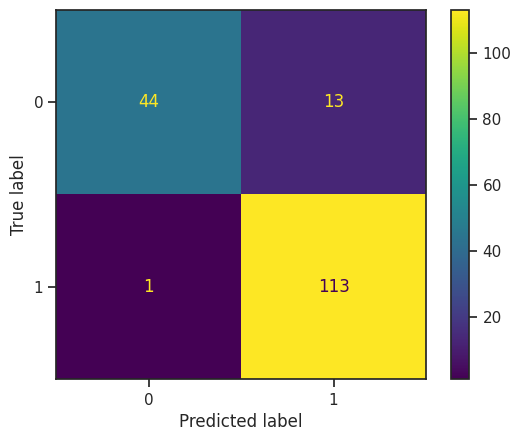

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

### Метрика precision (точность v2.0)

Да, по-русски она тоже называется "точность". Эта метрика отражает, **сколько положительных предсказаний были правильными**.

$$precision = \dfrac{TP}{TP + FP}$$

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_true=y_train, y_pred=y_train_pred)

0.9108527131782945

In [ ]:
precision_score(y_true=y_test, y_pred=y_test_pred)

0.8968253968253969

Если положительный класс предсказывается очень редко, то метрика становится неинформативна.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

precision_score(y_true=dummy_y, y_pred=dummy_y_pred)

1.0

### Метрика recall (sensitivity, чувствительность)

Эта метрика показывает, **сколько положительных образцов были определены правильно**.

$$recall = \dfrac{TP}{TP + FN}$$

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_true=y_train, y_pred=y_train_pred)

0.9670781893004116

In [ ]:
recall_score(y_true=y_test, y_pred=y_test_pred)

0.9912280701754386

Если положительный класс предсказывается очень редко, то метрика это хорошо иллюстрирует.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

recall_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.02

...зато наоборот - плохо.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.ones(1000)  # now all predictions are = 1
dummy_y_pred[0] = 0

recall_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.98

### F1-score

Метрика F1 - это **среднее гармоническое precision и recall**.

$$F1 = \dfrac{2}{\dfrac{1}{recall} + \dfrac{1}{precision}}$$

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_true=y_train, y_pred=y_train_pred)

0.93812375249501

In [ ]:
f1_score(y_true=y_test, y_pred=y_test_pred)

0.9416666666666667

В обоих вырожденных случаях предсказания F1 ловит проблему (дает низкое качество).

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

f1_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.0392156862745098

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.ones(1000)  # now all predictions are = 1
dummy_y_pred[0] = 0

f1_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.09342230695900858

### Интегральные метрики качества

Большинство бинарных классификаторов обычно предсказывает не точный класс (0/1), а **вероятность того, что наблюдаемый объект относится к положительному классу** (с точки зрения классификатора).

In [ ]:
y_train_proba = knn.predict_proba(X_train)[:,1]

In [ ]:
y_test_proba = knn.predict_proba(X_test)[:,1]

Когда мы получаем предсказание-вероятность, то качество такого классификатора можно оценить с помощью **установления различных отсечек по вероятности**.

Инегральные метрики качества способны **агрегировать информацию** из всего множества **различных таблиц ошибок**, полученных с разными отсечками.

#### ROC кривая, AUC ROC

ROС-кривая (receiver operating characteristic, рабочая характеристика приёмника) помогает **оценить качество бинарной классификации графически**. Для этого **для каждого возможного порога** (все вероятности выше порога принимаются за 1, а ниже - за 0) **измеряются метрики recall и specificity**, и **объединяются в кривую** по возрастанию порога.

![rocauc_expl.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/rocauc_expl.png)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
fpr_train, tpr_train, thres_train = roc_curve(y_true=y_train, y_score=y_train_proba)
fpr_test, tpr_test, thres_test = roc_curve(y_true=y_test, y_score=y_test_proba)

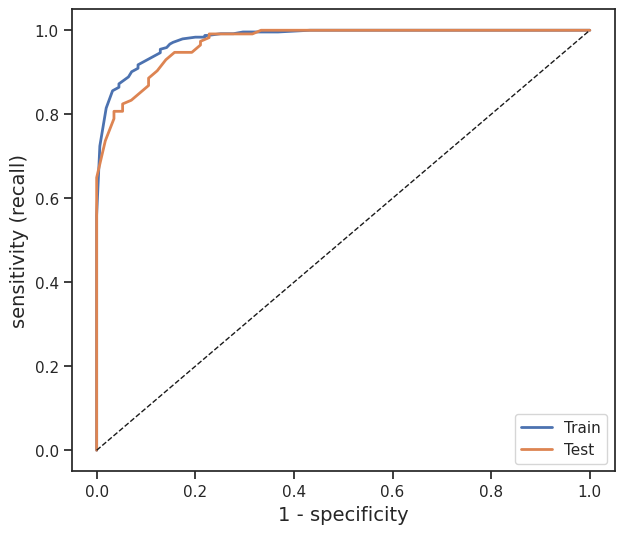

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_train, tpr_train, label="Train", lw=2)
plt.plot(fpr_test, tpr_test, label="Test", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.ylabel("sensitivity (recall)", fontsize=14)
plt.xlabel("1 - specificity", fontsize=14)
plt.legend(); plt.show()

**Бейзлайн для ROC-кривой** - случайный классификатор. Он дает диагональную прямую, идущую от точки (0, 0) до точки (1, 1).

Почему\*\*\*? Можно объяснить так: $recall$ и $specificity$ - это, соответственно, доли правильно определенных положительных и отрицательных образцов при выбранном пороге. При уменьшении порога мы переносим точки из класса $0$ в класс $1$. Тогда доля корректно определенных положительных образцов растет (исходно она равна $0$), а доля корректно определенных отрицательных образцов падает (исходно она равна $1$; $1 - specificty = 0$). Предположим, величина выборки равна $N$, а доля положительного класса под порогом равна $p$. Если ранжирование классификатора случайно, то мы ожидаем, что каждая следующая точка или увеличит recall, или уменьшит specificity. В среднем $recall$ увеличится на $\frac{p}{N}$, а $specificity$ уменьшится на $\frac{1 - p}{N}$. В результате в среднем мы будем оставаться около прямой $recall = 1 - specificity$.

В качестве метрики обычно используют **ROC AUC - площадь под ROC-кривой**.

**Для любопытных**: Классическая интерпретация ROC AUC определяет ее как вероятность, что **случайно взятый объект положительного класса имеет оценку принадлежности к этому классу выше, чем случайно взятый объект отрицательного класса**.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_true=y_train, y_score=y_train_proba)

0.9801407141908933

In [ ]:
roc_auc_score(y_true=y_test, y_score=y_test_proba)

0.9706063404124345

**Бейзлайн для AUC ROC**, очевидно, равен 0.5.

#### PR-кривая, AUC PR

PR-кривая строится аналогично ROC-кривой, но в качестве метрик при разделении для каждого порога используются precision и recall.

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision_train, recall_train, thres_train = precision_recall_curve(
    y_true=y_train,
    probas_pred=y_train_proba
)
precision_test, recall_test, thres_test = precision_recall_curve(
    y_true=y_test,
    probas_pred=y_test_proba
)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


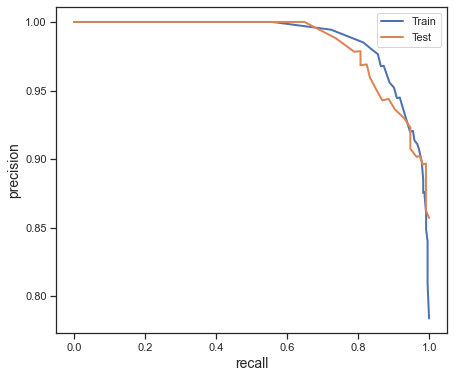

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(recall_train, precision_train, label="Train", lw=2)
plt.plot(recall_test, precision_test, label="Test", lw=2)
plt.ylabel("precision", fontsize=14)
plt.xlabel("recall", fontsize=14)
plt.legend(); plt.show()

Аналогично ROC AUC, в качестве метрики используется **PR AUC - площадь под PR-кривой**.

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
average_precision_score(y_true=y_train, y_score=y_train_proba)

0.985868982788476

In [ ]:
average_precision_score(y_true=y_test, y_score=y_test_proba)

0.9837427330163486

**Бейзлайн для AUC PR равен доле положительного класса в выборке**.

## Самая простая модель регрессии

**Как вы думаете, как устроена самая простая модель для задачи регрессии?**

На самом деле, мы можем использовать тот же принцип **k-NN**, но вместо того, чтобы предсказывать класс, нужно каким-то образом **агрегировать значения, полученные от k ближайших соседей**.

Чаще всего предсказывают **среднее по соседям** значение; чуть реже - **медиану**.

### Попробуем обучить регрессор k-NN

**Сразу разобьем данные на train и test**.

In [ ]:
import sklearn.datasets

In [ ]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
data_url = "https://data.bioml.ru/htdocs/courses/bioml/classic_ml/introduction/data/boston.txt" # стоимость жилья в Бостоне
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
y = boston.values[1::2, 2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

В этот раз произведем **стандартизацию признаков**.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Зачем это вообще нужно?**

Числовые признаки зачастую **не сравнимы между собой**, и один из признаков может изменяться в пределах тысяч и десятков тысяч (цена), а другой - в пределах единиц. Тогда первый признак будет **иметь значительно большее влияние на расстояние** между точками, практически **нивелируя влияние второго**. Чтобы этого избежать, **признаки можно стандартизовать**.

Теперь **обучим регрессионную модель**:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_train_pred = knn.predict(X_train)

In [ ]:
y_test_pred = knn.predict(X_test)
y_test_pred[:30]

array([18.98, 11.78, 12.46, 22.8 , 29.66, 18.34, 21.08, 33.32, 19.58,
       42.6 , 23.22, 23.32, 10.42, 20.94, 19.32, 33.06,  8.06, 24.3 ,
       24.22, 19.02, 17.04, 20.58, 11.58, 26.28, 17.66, 25.48, 25.78,
       29.18, 23.2 , 22.3 ])

In [ ]:
y_test[:30]

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1])

Вроде бы снова похоже, но непонятно, как именно оценивать качество. Давайте сразу с этим разберемся.

## Оценка качества модели в задаче регрессии

Непосредственно **оценить качество регрессии сложнее**, чем качество классификации.

Самый простой способ - визуальный.

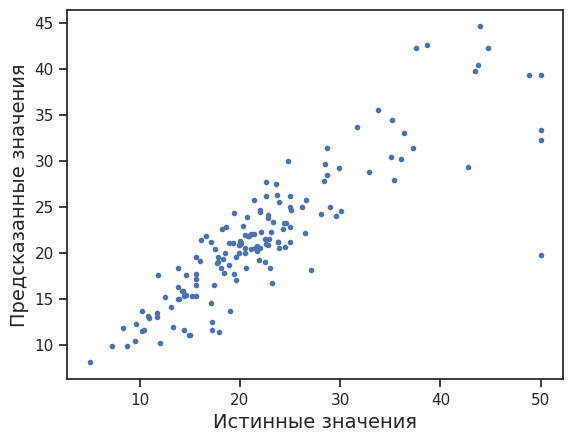

In [ ]:
plt.scatter(y_test, y_test_pred, marker=".")
plt.xlabel("Истинные значения", fontsize=14)
plt.ylabel("Предсказанные значения", fontsize=14)
plt.show()

Также существует несколько метрик для оценки того, **насколько сильно модель отклоняется от настоящих значений**.

### Метрика MSE (mean squared error, среднеквадратичная ошибка)

$$MSE = \dfrac{\sum_{i = 1}^{N}error_i^2}{N}$$

![mse_vis.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/img/mse_vis.png)

Часто смотрят RMSE чтобы размерность совпадала с данными.

Посчитаем MSE на train и test для модели:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred)

14.080089265536722

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

21.11007894736842

### Метрика MAE (mean absolute error, средняя абсолютная ошибка)

$$MAE = \dfrac{\sum_{i = 1}^{N}|error_i|}{N}$$

![residuals.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/img/residuals.png)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_true=y_train, y_pred=y_train_pred)

2.2901129943502823

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

2.975

Бейзлайн для регрессионной задачи можно получить, оценив качество **простой модели, всегда предсказывающей среднее** (MSE) **или медиану** (MAE).

### Коэффициент корреляции Пирсона $r$

$${r} _{XY}={\frac {\mathbf {cov} _{XY}}{\mathbf {\sigma } _{X}{\sigma }_{Y}}}={\frac {\sum (X-{\bar {X}})(Y-{\bar {Y}})}{\sqrt {\sum (X-{\bar {X}})^{2}\sum (Y-{\bar {Y}})^{2}}}}$$

Коэффициент корреляции Пирсона (или линейный коэффициент корреляции) отражает меру линейной зависимости между двумя признаками.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(y_train, y_train_pred)

PearsonRResult(statistic=0.9206205200595188, pvalue=7.914554349267386e-146)

In [ ]:
pearsonr(y_test, y_test_pred)

PearsonRResult(statistic=0.872651852624429, pvalue=1.5141364750333114e-48)

### Коэффициент детерминации $R^2$

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABBUAAAFSCAYAAACt5Od0AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAKZxSURBVHhe7P0NXFRl/j/+v5yszNCMtBy09AsEtl/d3CDb0t0QE+tTlj9I27yBgjZttW3jKxBmbZnpKnxoW3Wz+kCK3azZ8NfcPgUG0X6wTXcwW/2uQupXU2Z0NUMgNZU5/3OdOTNzZjhzDwj6evY4cTxzd851rnNzXee63lcPSQYiIiIiIiIioiAZ1L9EREREREREREFhpQIRERERERERhYSVCkREREREREQUElYqEBEREREREVFIWKlARERERERERCFhpQIRERERERERhYSVCkREREREREQUElYqEBEREREREVFIWKlAREREIbNZa7Gh7AOU5E1Ajx491GkEMgrLUGs9o76LiIiILlSsVCAiIqLQNFUhPyERk9LeRN1tr6JZkiBJJ1Bnmohvc9KQOHUFalts6puJiIjoQsRKBSIiIgqDEUkFL+G51GGIUP7dF3GT0jEjxQhUv4P3tx5XlhIREdGF6QKvVDiHqmcacGnvQ8goO6suC0V7fQ8RUXuzoalqHqJ69EBsYa18tiLqRH2TscRiwWdzR6kVCipDfwwdGaX+w9M5WMtmoUePKEwo2S3nYCIiIurOLvBKBQmNVkmdD0d7fQ8RUTuz1eODJatgxWTMu/9/o6e6mCgQtvoSTHDGQfAyRWWg8IP/Di4+gu0Y9m+3AEnTMGVUpLrQoSeMd01BrtGKivmlqG5itQIREVF35qNSQYK17Agu7X0Ql2Y0yTesemyoL7Ha33P396jnfQERUSeyoeWrj7GmQj5Dp9yNMbG91OWqpirkRekUEpVpAvJKylBV36S+mS5GhrhMfHzIhEyjuiDdBIsSF0GdmutQuXAgPpp8LxKjUlFY26i+0ZczaFi/HPMrbkFB4aNIiNC51ej7U0yYkQBYK1BuZvcIIiKi7iy8lgq2s6h5397YdsxdlyPqAm/3QETUtRzH1vffQTWGI3PmOMR6noN/aMRh/RphWQWWZqVhXPxoZJTsRIu6lC4+huuG4KbeYs6IlDt/guuUpaqIOCRn5qOw4F75Hx8hZ16ZnwcIZ2CtWozpad/gkcrXkZ3QT13uKRKJE1LkX6zF0iUf8qEEERFRNxZWNYBtz0ms/ZuY64kZ9/dy709JREQdq+mfKF9TK8/chNHDr/NxQp8Jk+Ws6+mz1Irmuk9QkD5cfm0nSrOewcqAnkDTBenkCRw9KWaiMHJof5181Bc33vJTKI0ZKrZi5xFvkTvsFQpTp+/D/VtWYWHyIB950oC+iXdhhvjSik9Qs+e0fTERERF1O2FUKtiwp+Y0qsTsL3thTJtHZERE1HFsaDJ/ijWiJYJe1wefDIiIm4C5K4pRkCRKdR+h6P1tYEeIi5Pt8H5sV1q0JOK2m7y1LHA4jsZmvUoFR4XCt5hRtQxPjzL6v8FwdIFADdbW7GfARiIiom4q9JoATdeH5Cm92za7JSKiDnQS32z7uxLvJmb8zYgO5RwcEY1bRtkj9FsPN+IHZY4uLudwZOdWVIjZlFEYfp1eqM8zOLx/jz22kjEWQwdepix1saFl93t45nFRofAKMof1VZf7E4HB8dHyXyt21FnYBYeIiKibCrkqoOWrFqwRXR8ieyHvwcu9fpHNegobPvgOGYMP2gM6KpMFeSVNqKpvVd/lrqX+B5QF+Rkn21nUbjiBkmcs8mcO46F1YtQGCe9OP6x8z9hnvkfZhlOw+nskEtb3nEVZxiH5fT6GoLSdQdljXt5jbUKGss1HUKY76oRjiMuDmFDyo8fTnUACbEpokN8zyNd7lO3/HnnJjvQXk9gHzajVXacAtvncKRTeKL6nAYW19rVuqjpqXw+/k+szAbH9iJK79b7HMTUgr8pbE145DWub1X3v+ozY5xtqz2rS27Uf/E43fodaj59Tjo2SoxirfV/yUZR4y1eOfKHus7af97V/PNI6WV4fb3fwLadRouxL+3cW1noecx2dv+WUrf0OseI9Oulmz5tN+KDwsHveGXwYhR/8gHq97Tqfx1QA22traMJjyvnO+3vasB3C15vq5JkEpN0y5PyM+mAtQ4YS9HGWvN6eO+oYqvIS5dc8h7oUT7RfxFi3oJGOaQQyCt+VjzOr/lNrm1Xe92Xyvs9QhtB0fk4ZnaBa3ve+zxF+RzqImocqz5EIHNuYUaYed7XycZenWX8R8PKvXkdGUN5f9i4KM0a4/VZURiE+qKrXFKRdQ4Nq36c/jZWPy/Yqgjdi1xazMmccORQD9S7mLf/Eh2tq5BkjkrInYVRf9zfZrJVY9MR6jFj7nx4VCo2oLfz/fAwb2QvRN49CjDxnXfMpzJ5pbzuAsiyRblEYW7iVlQ5ERERdVGiVCi0nsTLnJMQtxpjfXSnfYNgXu5NvxKuOYVzMMTyYfhLvugV3bkXRnBOYMNKKjJLT7jcKTS14Kfk4HvL6mSOYV6Ut2Lm01Dch767D+PnDTZj5J/3Kh5o/teChh4/hhruOosxrpUb7fI93rdi96jiefDfAwkMbriEu9x63eblZ865l9wnM++0Z/Fv9tyebtQXzlO1vQdGX6kKF2AeN+PmtR1CyO9htDt/RE0FsactZ1O1U53VJONyok/5ygbXqWStu+EVjm30v9vmDvziCRz3zbCBO2XBC6bMsaI6NOaeV48jpy9OYKeerxEcbsdvrj0iwbD2OR2/1/Ly6f6Z9h6o2BVMbvtmm2edfnsS89z0Lz3ZNW5vxnFKJJrRi09fngsxj4eZvH0Rl0X+IvHkCDz9/1j0PHz+L/PTj+N/3+6gw8apjjymfWk5j1bwmrA42AH6LBXU7RDG3DwZcFUzXBw1nTAadAH1hsjX8De8o3+051OUR/H31GlSr/3K3E6U50zApMQW/Ljvgvh9su1FyTwISJ6Vhck6pR8VNKXImj0X8xFflfe9t79nQcmgPdqj/0mU9jsYfvH3+tHzcrcCjCYmYlLVUs/4i4OVEJE5dLB937hULohLjnij5/WnTkFPqfkKyluZg8rgkTAypsNwsnw/bKQaBY+hHJGDGhJ+i7eW8EbUrFyCn2gpj+mK8NivRI37SMVT/MR+Lq9cjJ/FquFd+XI3EnC3q+/T1jIrGaDFj3YP9hz0qZuR12/e5SDcrqlf+DXXe6oGJiIjovAq6UqGlvhmFs48jXxQ2f94bhbN66wZotDXIBZP0U/aKh99GoHx7FM6evF6Zftx7Df7rt5fIr0h4d85xrPR8Ejq8F15/OxL/99/299s/0x9rF1yKa+UCS8F9R1Hk8ZmW3Y2YnXxCKQSL3/vgfwbix5MDsXZyD/nVHpj69kCcbRmIL9+LQPbP5UVy4e2h5GMoa3Av+LTX9/jSUtuIJ+Z4FIg6i6gQ+k2zR4WNhvx60bTvUSBv/7WTe+O/9fabXHib+Rv5RjP4O+E2+iYPQIP6/cq09ypMVV65DGv3DnYtPzkIS5KDeBYrFwwOi20c1BtfNmm+37kv9bSitugoJrwi563IS7H4w2vxveNzYp+/1gtj3PJsTyT/YZDmuwfj27fVZsGTr8K3zuXydGgAktW79Zba45h6nzg25Py0oJ8mn8uf/58+Sr7697pmPLHypH5hY10Tfp70A96N64X/UvKn+tnqKzFVDAf/5SnMeK4ZDe4lMpw4Jv72wJTfXo5kea7q/ZPY41l+kgvtHyw9jX9HXo7XX71UWRRsIbtD87fNhuN7L0H28r7qsalJO+f2e68w6RD+jimf5Dy38jhmOitxAufqBx+P6KhgKxXOwFpbhsInn8JS8R1JOVg0JS6M/nCeGvHVeyUokb/bmDsLD8p5ta0YpJu+1QSPFMMX7oIpN0V+bSdKctfhK20h0vaDvO9HILd4HdabLWh1fu5HWLYsR7oIDVFdIO/7ei/73oYfGo8rlRExBWac1f6uxYR0+5u8K52GxNvmoDQ+F6ucv6/97Rcwff5f3Y47W/Nx7E3KRbHpI5gtP7p+r9WCLUXpMIrCck4h3q8XFQQG+Xy4yH04R+d6eQbaNMvnw/7KK+Gy7fkCa8WQpIhG/GDt1bwJ9VVlKMl7CIk5B5Be8AmqV8zAMI/hIW31H2LJUlF5FKIBQzBCNFXAURz3jNVg6I/oO0UwUSOSZv0S8eelOQ4RERH5E9g95LoTuEFpvnsQV49sRP46yIWhq/DlO5FI0B3y4RyqlzUrT96unXoV3l50NZLjRCWCncHYGxmL+mPtVFG4a0X+s/LNi+NGrG8ElnwyAJmpVyJO890G4xVInTsAHy4Q39OKV9adcgUVs51BRWGLclM/5umr8a78ew8kXNp24wyXIuGBq7Hkw2uwWFQIHD+DJ5f90P7f44No5vy7B06iJtKAMSI+VWcSTdJ/JyqEemDMz/V3fdPWH/CKWmH04YprML7NfrsGr/9S/seXp/H+1q772OicfAO+WczccSmiAr0RbTqF9/8oKgsuweINAzD3rstdFWZin2fI275cfJlH/gvKOWxdZ29dMGZBJFbM7aPJ5z1gTOiHxSsjlEJ/zR9/wFYvP3Lt5D7Y8eEAZDjzp/zZUVdj0Z8uw7Xyv/797g8o19YY2Fqxf7v4dw/8LDUCD4l9+Dd5PTxqFRwjulw7/QrccY298uXAjrPy7X5gOjx/97wCc7+JwpLMqzyOTbH9/fDsAvvO3ll/tnOaSgdwTHknukwcw/3Pt+Ja+bO3qUsDpRRYxYwxEv2u9PfbryMt6lK4niBfjqjENOSUfoek3FKY350tn8uDXX/vbA1V+HPRR/LcvciecovO028vIoYh9Xcz9Qv4PRMwd0+5vO8flPe9NgjgZfK+z8KzCyfL87765p+GZZ/oLhKD0dHXhtRdxJi+Crs2LpaPO8fvi9/+NRYtn62MjGAt+Yt83LlaEPRMmIs9ny2Rr2f/gQSjJg6BwYhRT+VjYYr41D7UHeqU3KpD23pjHbLir9DkkasQP30Djt/6FMyWWqyeO0E+V7XNI4a4TJRrK0LaTBaUZw5rex1t4yB2HPhenVcZhiC1eIfyHZ/NHcURpoiIiLqoEO8iJbz7x5P420EvzaKbTqP8bfGKAdOn9sYgvV8xXIa7pl6uFIDwtzPYeSSQJ3WX4Gf3X6EUuP799imY1QKXbc8PeF1pat0TMzJ6w+hvqyJ64/H5veyFrw74Hq/kAsj634tmzj2Q8ad+mB3t7Yl5R5ALMOu/V5qkXzu1D5b8Ru+W+hzMFaIJdw9MndNXv8JILlzffJdIGBtM285q+kl3JRKOHjiHA/LckBGXYoB9oV9N5lN4WzxtnhyBaQmuyhQXA6JvvgxD5Ll/m37EN6FsvPPYuAxPTrtC9ybZEN0L4wfJM8fPYNs3ekfYZVj2h6swrM2He2DQXVdiunhaL++fukOazypP+MWMAZH9LseYKWL/n8PaGm1XIseILvJxm3IFYof0VLYVR1rRrLcans5r/hZ6oE8/+0H7b6utE4IOBnJMeSdac/1edJmIFPszQulXHjgbTp44DqVHTe9IXNXb38lKz3CkF7yF15+b5l7gDYtcSK0vR9G836PEakRSwfOYleBvNAEXm3UrVv/xdZQG/WS6p7zvlYzvI+Dk9ziw46D893qMGHK1fVFQZmL5H6a1eVIvjsdBd6Xah0YMpoLAcCX6DewtzzTicOMp+7JO5wr2acytxAlHRUDzDhSL4Uatm/DR/v6Ib7f8oaPntYgeHVzuJyIioq4lsDtRTVNuZzeE42eRm3QEj5ed0RRK7M598yNMSlPgnrjtJr3CmV3fmy7HXcrcOeyzaCoVfATZu3xki30Yy+M2NP4gPiPhyM4zQQ9tGTG4p3xLLWv37/FGNK0/hoeUAkhfvDjpsgATv32IJvfTp6sFmBf74Hq9Hz93FttMYm+6AlK2nRrw8+d9lTB9fLbvMeQ3qG/rUK3YpbSiMCDtlksDfCKpiTmgaZnjOV3xi5NKZUWoXMfGGTwU4wiG6DGFk04RlyJeyZA2bN/f6jo2j57FDuU7DejXx4DYMb3adoGwqSO6yHlkQmJPGOT3Kbf6O8/BfzkplPztPQ38pbN+MNdDuEHO450loGPKG9HNaMYJtQLmaky6PtgKGFdT/sBom8//CIu5VD5/f4fSnLuR9NR6j64ysnO1KIx1PLH2mNSAhe4cLSEuQZ/4u5FTGoXcVevxbravp8t7UZp2g9t3XxJ1Gx5ZCuSaqrBR98m0qLSolvd9ITKiNOvU41JEpb2uvseLpm+wZdNeufR8O265URTm21FEFOJHiFoFi3zcHXMddwrRjWBD2+CSPW5AWqlS03f+OIN9GjEiPsqV3hHD8cizTyPFrXsGERERkb6gy7Xu3RAkrP7t91gfRDyBDnWdfEMb4BYZ+lyCgcqcR4WG0F7f4yQC832Puc+32rsV/LGvfuuNDiICLy5SAmuKZv39kTqofZ4gx0QaOrViJGDOyhED4gd30BrGGALOI6EzILKPOhsogwH9rrPvX20sBFtzKw6LmUE9MWRADxhie7fpAqHt+pDYV5O3/VaYdWb+bsXuksOIH6kXzLXzhHVMiWCgixuVuDSiC8wfU0OpYDTgyn6RSpP74F0GY8IMLH57OTLlL7CW/B7Pr/cIihi2Hdj6rzpYjoRSyVOBpWmTMbtkp0c3hiZ53/8acfFjkTY5B6WB16gozn2zDSbxmRGxGNyOXT0UzlYHVvm4+8GVli07UZIxGvHjJrUNLtkVOIN9xmP8zYPd8qEh+maMV2oVa7C2Zn875w8iIiK6kIR4Z3UJEmb1c8YTeL28bWuF4HgUngyXI/MTRwA2j8kZyE/HF2dhCbBJurOQhZ6IjvIoELTX96icQSsjL8Xrf+7nJQ5FBxFN0p9rRMGXPTB1eSRm6Tbr96QGpNRLf81Unqk3lKiPzzb1x2LRrL+D2fadxibxVD6IFiduPIMs6k2fXI24sMolnoEo9SYjMoP9EZsNjUpXoh4YHd3T2UrD1myz9793xJgwXOrRBULb9aGXvQ/8gEsxQtlfvirMwsnf3tPg1P/0tne98OAKAimCXF6FL90+rwmU2ZFCOqYcRJeJ45jxSqsSF+M1L4Fu/TOg91WRUJ63nzyOEyeDPwMbBiXjN9n3ynNywXdZGb7SjpqgxC9w9In3mFan6lRmuFpCtFpqUJR+DaqXpmPiM+9ht9fRGPQCNdahsjgXSWIUiKxnsFLe33Y2ed8X44msErlgLrptmNwDH0ryOds0U32vntPY9/VW+RgwIuWhOxDKacEn2w9oPCw6o2jjNYhRE55Blhj1wZiOApMZllbNtkrfwpR+Ppv929Bk/hRrRJ2CXuuNnkNwS5oIjGJFxef/whH70vZ37t/Yt/k8t9ggIiKisIR+axXRC/dPt986VT3fhGpNPIGeUZfah4iSCyNbdonAd/qadv2IT8VMZE8M1R0cuy3nZ9QnrqLwNMDR97vhDL7eF9jNdcuhc/Jtq+yXl2G48mS3vb7HQ6O2mXMkHhkWTAEkXK34u6ZJ+qJHevkuwPTsieg7xDaI4RaDH1ava2jFVx+eUrqxJE/pHUThoQei5EK4ItAYAiFwHRty4b/Z19P/EDmH0uyBgf0c+dEVY+JaowFXKss8ukCcc+/6oHDmBx/DeXZq/rah7jN7kEslP2f3RYJR55jrUEEeU24kNP79e1eXiUV6cTECZ+gTae+e4nMYRF/64Wf3p0KMtYDqd/D+1vZp9mEwjsbTy15FrmgFUVqIgoqDgZ9LIuKQnDkHTyqF7W3Y9PVh9bMn5X3/oTKMozHzRXnfpwYXB6Lln/hwjRIeFQ+NGRrGhc8L5xP/fvJxd4V92bm9+GylCFY5HJnLFyA7NcF/nJ5OdQaH9++xt57Qbb0RgcHx0fbZzfsCrmgPXaixLoiIiOh8C+MWRy6UTLgSGSI21vEzKDdr7jiuuxx3iqbV8u3g2++ebNtfV7Cdwafv/qj0YXc0t/ZL+5m0y3Gjo+wTfwVmiVYTOIc1q0/C6u8OtuUk3lh4WvkebcGzvb5H69u3W8Js5hy6aw/KBb6gmqRfguF32guFVfJ6f3W+ApKHwdbwA14TIzjIhbaZE4JJ7x64bvhlSiEbfzuFD7/yXhkWFuexIeexD0+HOELBGSxb/oNO/rSh/oNmFImyobZyQC7MWvbZj88r+l9if7otM8ReiZliBJa/ncbnH/6gdH0Y87srMcp5LPZAP6XQLiqZ9CtAzlv+7q/T/cR2Drs8h6dtZ8EfUxqRrVjzSvt1QzL0kQuwylwd9llC6/NuiB2HmZkiCEct1rzzN/1zdSj63oEsZTSGnSh5vbLt0KW+OJ/6e9G/n86+P4Jd5v+n/sPTGTRUlKKo2gpj5q8wITbY4TcdPsSyZZ/pHHen5eNupX1oTmOKfNzZA0a6XC6v8pVtjg2bdTfM3/rYzg53FDs/36bMxYy/GdFt8vJlGDg01t4qZe9WfL2vg+IqHD2AHUpDhQGI7OM4ZxEREVF3EswtcRuGQb0xdbr4ChuKlja7hoU0XI4Hc9VREd49genzGlFrdRVKWupbUDLP/rRPFH6WPXmla8gxaxMey/gOH2w45XbzZrOexGpvn4m4AtPmX4Ex8mzNK98j8VH581U/ti2w2c6idsP3yLv/O6UgJAoGi6ZomvC31/c4Saj50hZmM+fQ/Vv+7S1BNUk3IO7BPshWx/r/+f1HUeKx/TbrKWxQAuQdQZlmn3YJbqMPXI1JQRbaDHF9kPdbsRdbkf+LI8graYGcVV2U/X4ChRkNyCg7qy4MkubYqHn+O0x85ntU1WsLwhKstc34oPAwBmU0ee2D7cifm5yfbUV92XeYOcdeeeBeOWDDiWPir3uXCNcILOfwm+k/oEp+Zcb92ifvBgxWul9I2LzvnPwuT52dvw248RZ1yMw/NeHlMlfebKlvRuGjRzDhlY6tVAj+mNI4bkNNbShdJry47ie4UxmSUGcovkAZrsdd0yYqBUfP4RDD0wuxE36lxGxAxZ9RXK1kQL9s1lqUFS3G/AqR87WtCnrL+/52+3ouXSLv+93qvrePNlH46N0Yt7hCWeLJ1vBXPD9nBazG2Vi+4L4w4n1YUb04BQmPviIfd46meU3ycbcAM7PWyfNGJGVPko879Qec3QdqsfSlIpRpP7PpFTyakILF1d6O8GDI19fC+yCCP0blVQU+1K0jcKW83jGRbSs9xPHW96ZEjFfmO27Yy3OWffbhf42xGDrQo/WJ7QDKskbI2xaFsYVb216LiYiIqEsI+fbKricSU+w3+Z5j3vdNjkTl8kvthac/NePnmijvV4/8HjP/JN/8yzfnS8si2xT+zq47iYcfPoYbIlyR3S+P+Q6Pic/gEuSUen6mB4zJV+P1t3spFQL/Fp+/79+4uvdhPLROFHzVEQkiDuPnD7eg6EvIBaErsfmdSI+CQXt9j0ZYzZy9Rcd3rA9w4PljuEIsu/E71LYp9YXQJL1vBJ77tA+mKhULpzFT2X7Xb18ecwwPigB5ctbpd2V4T1rbj02+qW6Q98sRe6WTvJ9WTz+CyzXr7Zo89qW8bNAzLeqNeE8kz78Gr08W29WKojnf439fq/msst+bkC+XH1xdC4Lnfmy0YMJIi+s3xAgGv2jEw8+flW+yHV0VPF2C7AWXI07On//h/KwF/3u62jWgTSFfQqNSAdQDI4a454W+iVeoQ1DK2sSgcA3ReGDHWRxV5jyElb+D13dUH7zk2D/TXXnz6pGNyn6Z+tvLlGPXu/NwTGkE32XCB0N/DB0ZJc/sxeZ9/9ap9AmEXHBMvEsdDrEGaz78Z7sV3AyDfolpM+yFav1WEHqjPyQiTQloOBzpxc9jSpyjVYG8nqOmYqEY5lAJ5HgT+iifcYw2AaTnzkaS/c126ggWlwxOQ4kou1tXIG3w5W6/55yi0iB/hcwxikUi8qo8K0JSkFuQjfjSbKTEX6V+9irEpy22d8tIXywfd4mafRuJUY8+iXSRttWLkab9TEq2/HtTkZutdD4JU7N8fO5W5rwPp+mpEbVvFNlbV8ipvWPzv/Rb5jkrrkTFyBrUeo2PESpHrAvZ+ETc5KiQcbAdw77PRX8uK6pX/g11oWVyIiIi6mBhVirIN/lJffGS2px70Yc/am5sL8GwzIGo2x6J98QQlOpSReSlWFwaif+7eyCeHnWp+0oY++AP/9MPa5fbC/YuckFqeT98udeIRcken1FcgrjUAfjs39ei/O0IZCvdGDyJ4G598cH/DMTB1fINn25/7Pb6HkGvAiQAVxow0LMFbQjGPN0PL4UwdGXEsH5YvVt/+6+d3BvvvS3vh3/0R3IgXVZCFdl5lRb/lu+mnTfiEb2QudqI//vXq/D6bz0Kjkq+vUre79dicbLvZrqu2AV6XMdG23xuz1tr3+sP86IIV2scN5fgtmkDsHH71e7r+PNeeF187q1+7oX8c+ew7wtRYNYZTaJvL0xQWhvJheXHr/TowqOJM6IrxPwdDrF/VgxAeWlve8WXasxvI+T9ch3eeuoK3KAuc3OejynFz6/Ampf6tOPIGJFInJCiPL3fu+lrBBgGpi1nV4X2LrjJ58Yp05SCvrWkAluOOL74OtyeMcO9AsBJLrgXm1BZtxmrM4e7V75EDJf3vfzaugJ7QV1hRFLuG1hvrsBbv0vW3/chacThxlPqvMP/ko+7xdhYV4niXE1lQFIuitebUftWhnzcaXeuQT6XzsCK6s+wriBd2U92Yhs3wlz7Jn43+n+py/wwRsrnQ/8Zxziwn4/zjsMxVOXdhcQcEe/BzlqShsFxhW0r0QyDcfP4ePt8dTYS+4zSqWwJRwsO1e2T/xqRcudP5JzhwdAf0XeKiiR5P8/6JeLZO4KIiKhrki5oZyRT+kGp5xUHpXTTGXVZKNrrezrA2ZNSQey3Us/YY5L5rLrsotMqmQsOyfvnkFRgblWX+XfWfEyKuUJOu/QTkkVd1qVZTkjpYn2vOCyZLDZ1IbW77nRMnaiUco2QgMlScd0pdSEpzpqlghg5bWIKgtiPzfK5JElOzxj5XP+tfZHFJKWL5j6YKR93XS9DtB4ySZlKHrhXPv99ry7tJph/iYiILgjt9syMiIg6Wd+fYoLSxaAGa2v2o70bp1NX14iv3itBidWIpILnMSuhn7q8O9AMaZlyN8aEHECTiIiIzjdWKhARdVuOLhBWVKz9IrhRFqjbszVU4c9FH8GYuRxvZ4/qhGCp7ek4zOUVSvyMzJnjghj+l4iIiLoaXsaJiLotA/ompWOhCKZX8Qlq2m30Bur6TmNP+V9QgnBHtTg/bA1/wztragHjREy763rejBAREXVjF/h13DHOfrja63uoY+kEIvTB0MeAGPmv76CKRF2cIQ4P5j0CI9Zh0Yf/N8RRIC5gMZGQD/UA9USfyAHy334Y2O8K+6IuqxfiMt+HZFmO1EEeQzF2eedwZEuF0m0jZWE6kjxHfSAiIqJupYcIrKDOExEREREREREFjI8HiIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIiIiCgkrFQgIiIiIiIiopCwUoGIiIiIiIiIQsJKBSIiIiIiIiIKCSsViIiIiIhIdQbW2v9GWdmbyBsbhR49etinqAwUltXCalPfRkSkYqUCEREREVEXc+rUKeTm5mLz5s3qks5gQ1PVC0hIvBdpy/4fbnt9NyRJgtS8C6YZh5GTNhFTi7aiRX03EZHASgUiIiKiYLXUo6okD2OVJ7hzUNZwRl5okxeXozBjhP3J7tgXUWUVy88vUTgtKytTCqhinrqXMWPGoKKiQv1XcOrr67Fo0aIQKibuRUFhLlLj+tr/GTEMk7IeQgqsqC5aj61NbK5ARC6sVCAiIqILW8tWFGqbcYc0jUVhrfp81rYbJb8qwv47nkVlXTFSrCsw50+fYnfVG1i5cwhmrf4aJyrzYax+AdP/WIMm+6fOC1GZcOeddyItLU35NysVOo5IW1GIb6/p4MGDeOyxx5RpwoQJWL58ufpLwdm6datSMTFp0iTle30zoG/yIlikv2JuQj91mZ1h4FCMNKr/ICLSkoiIiIguaK1Ss7lISpJve8StD3CvVGD+Xn3Nmx8ly5blUrrR8Zkk+TPN6msurXXFUor8unHqbKlg/X75lzyW51ZKJ9RlnenkyZNSTk6Osu633nqrVFdXp75C7k5IdZUmqTg3Rd3P6pRSLNU5dqYvrRbJvP4dqSA9U1pU/k/37+iAaVf5y1JKUq5UvN4sWQJZP5XJZHJ+R01Njbo0OPY8bZSSCrZIbY8EIrqYsaUCERERXeAMiEh4FIUF96r//gg5c99CbYuvJtyXwTjqCazYWIQkdUlbNrQc2oMdYrZXMh6eOERtAupYbsSI+ChEKMs61yuvvIKCggLlKffnn3+OuLg49RVyatmNsrzJiJ++ASfSVkEuo0Nq3oKCJCNixt+MaJ93ySKY4RrkjUtA4hPlwAO/wa9Gx6Kurq7dp5dffln5RbEvh4x+GIt+J//OHycianAGXtlqlXObf6mpqcp3CaLVQtDdIWwHsH7JK6hIykHhrMTzkqeJqAtTKxeIiIiILmzNWyS5wKg+sQ3wiWvrLqk4RXxGr6XCUakyN0F+bbJUXHdKXSY4lidIuZVH1WWdp7y8XNlG0ULh4MGD6lJy03pIqswXrROGS5kmVwuTwJyQdhVnSkaRh3JNUl1zcJ8OxrJly5R9Kf66ad4lmZTWFcOl9OIdAbcccOQNMQWcNxxplfSCVGn5UV1IROTClgpERER0cYhIxKzCHLXlgRXVOQuwsrZR+ZdXhqEY89AY9R8ebMewf7sFMMZi6MDL1IUyx3JEI35w5z7TFf3658+fr8w/88wzGDx4sDJPWja0fPU+XlpcIe+7iZh21/VBBBk7g4ayeUjO+hjx+avx7uJUxEV0zO308ePHUVpaCpPJhDlz5qhLVRHDkLq4BJX5USjNehhPlR0IqMVCSkoKcnJylPk//elPyl+fbA2omp+J6Q33Y8u7+Ug2avI5EZGKlQpERER0kQilG0QvxI65Gynqv9y0WFC3wwqMiMVgTcHStucLrK2Ql6fcjTGxvdSlnePjjz/GP/7xD2X+nnvuUf6Sp+PY+v47qJbnjDPuQmLfwG+HbQ1/xfNzVsAqugHMGwdjB95JR0ZGKl1XRNcFXYZBSJ73EgqSvkPJnAKsV0Yg8e+BBx5Q/oruMT4DNzorFKaiasUTGMUKBSLygpUKREREdBHph589nIlMRxT76gLMXWn2Oe6+IS4T5dJnmJugbXVgQ5P5U6yxGpHy0B2Idd5RueIsGEcOxcBOvtMST7YF0Q//iiuuUOZJ6wysVSvw0tJaeT7YmBfHUP2nRSixJiD3uRlI6KAWClp+92FEIh5/7hEYxQgkz/8VDQE0Vxg9ejRuvfVWZd77UJVN2L3qeTyuVCjMwLBO2FYi6r54hiAiIqKLimHQfViwfLZcpBQC7AbRxhkc3r9H/nQURg7tr3NDpRZYW3aiJGMaCoP+/uAdOnQIGzZsUObFMJK+2dBSX4Y8ZajNKIzNK0N9mxYbLagtHCu/7hhW875O2Y6OcRr1JVPkbbgcUeNeUFopiH1fkXUTLnFs34QS1PsolNvqP8QSURmRNA1TRkWqS72zWbdidd4E5bujMlZgq9WjJYESKNL+ur/f9s6AvknpWJhihLXkLyjfc1pd7psYXlJwVEK5ExUvr+CJNcOx1rNCQRmedRpK6gP7HSK6OLBSgYiIiC4yl2HQpBwszxyu/juQbhAebPtRs7ZGnvGMmyAX8kZNxcL0a+QCazLGvbQVQ599rc2Y/x1h69at6hwwZMgQdU6frWE9nkpKw9Jqq/wvK6qX/h5LKg569MuPQMLc/x/Mju4ixqGIHtjbPt/t9EJc5vuQpFacqMy3VyilFKOuVRJBy+1TeSbivN4Zn8aemk8gnuvH3PtL3OzvyX3LTqx6JguPLLW3BLCWzsGkP9agSfmXTFQ2zZ6MNPX1sFq1OON+1GBtzf6AYisMGzZM+Su6yojKKDdNNfjj9BdQXZ2NxD6X2Cs9HFOf25BTfVZ9IxGRHSsViIiI6OJjGIJJC14MqhuEG8MwZJZb5MLo+8iM84ibEDEcmat3yK9Z8NmSTCTH9VVf6FgWiwgOaeczQKMYHvD5ZcDy/Wht3YXiFJEIciF3Qy2O2N+hEYGoaPt3GWek4q5B3b1fvaOFSZAFeWclUgLSbhmCnvalXpxBQ8VKLOr5Ig61nkJd8WRlqdW0Dd+ck2dErIJF/wdZ3z6ISssJ+fWpYQ49ehkGDo2FUbS8WPsF9gRQqxAdHa3OAceOHVPnhNOo/2AllooEIiIKECsViIiI6KLUPt0guo5vv/1WnfPNdqQe26/7HRZMGgKDdnSLTWbsavIskTZi1xaz/PdeZE+5BZ1TPdKRjmLn59vkv0HGUzjyL3wugm8GMqKH7SjqthuxdMF9GGTQBPrcuxVf72tCw/rFmP73O1CpjKbQF3GZ76A8c1gYN+UGRAyOxQgxW7EVO4+Imgvfevd2tTjZt2+fOic4WnRoWnC0mXQq0ojoosZKBSIiIrpI6XSD+FOV8hS7O3vsscfUOX0G43gsWPSAXOAV/9IUeq17sP+wR79/x/CYKam4/2cd34WjwzV9gy2b9soz8Rh/8+CAb4TPWfZhs5jxHD5UjxiVYcGzSFVbdRhi78BDSmuQXfi87BXMyz2Fha893a7DMxoGDsVIpXasDvssjHdARJ2LlQpERER08fLoBmEc2A9X2me7rauvvlqdC4yrQLoPdYfcO4DYh8eMQm7e/T7iDQTjHKxls9z76YcyZZSFVPljO7wf25UPxiM6KoSn7b0jcVXvIBPCMBg3j4+XZ3aiNP8LDHpjAR4Z1s5tPnpfhQFK44NmHD3BSgUi6lysVCAiIqKLmA0nm5vloq7MOBvLfzum2zfxr6+vV+cC1PdG3DY+Rp6xYPv+Y5pAf8dQXfxnVKT8BllJ/dVlWsdQlZcoF/KndJPRAFzDfSJlFIZf5zsygss5HD2wB6J9Q2h648ZbbleDQz6ER5IGBXADHmraNuJw4yl1noioc7BSgYiIiC5eLWasfCIfpdZ7UbBxobPJeuBsaKqah6geUZhQsjugyPsdzTGsZOAGYPidt8h/rdhRZ3EGq7Q1/A3vrBmIgkWp+q0Umv6J8jW1gXUJcOoJY+pKnX76QU6rU9VYGME4iW+2/V1p4RDWaAtBM6D3VZFQGhLs2INDgYwyElLaEhGdH6xUICIiootUI2pXLkBONZBU8DxmhTTs43GYyyvkgmoURg7t30E3Vk2orypB3thpPp9a9+sXaswDx+gBgHX7fhxWyryN+Oq9Enx8TyYe9hZLoW8ylljkAr5lEZL7doNbStshfL2pTp6JwfjbbgyiRYoBV/aLDKESQ9WyFX+cW2Rv6WD9O7Z9c1JZ7FPIadsPA/tdoc57d/Kkax20I0EQEYWClQpERER0ETqDhrL5mJjzEYzpi/HarMQQh/Trj+QlZkiSGUuS9boIhOMMrLVlKMwYjfhxWVhafVZdrm/YsGHqHHDo0CF1LhCa0QOUJ+nn0FL7FuYWDcVyZQQD5U3dX4sFdTtEO4XrMWJIMHEnNC0N9u7BgaP+R1dwsh1A2VO/wUf3vgZTboK8oA6bvj7U/i1aTp7AUaWeoA8GXOU/VoR2xIf+/ds73xLRxYaVCkREMtEHedGiRRABwIK7GSdqa/v27UpeWr58OY4fP64upa7E1vBXPD9nBawijsKihzEsoivdEtnQUl+FkryJSPjTPgx94LfITfL/nHz4cMcoFsCBAwfUucAYom+GElbBehyNzQdQ8ed3cNnCOZik1x2kqQp5UY6giYnIqzqmvtC1nftmG0xK34fbccuNriEVA9EzKhqjlTmRPoFWKjSitmg25px7Eq/NGo/h8aJFgBUVa7/AHqVWQVRsvYznqxpclQwhpm2wASh3796t/L311lsxePBgZZ6IKFSsVCCii15paSni4+Px7LPPYtmyZbjmmmvUV4i8cLvxb9uXXjz5y8nJwZNPPqnkp4qKCvUV6hJadmLVvN+jxDocmctz9AvOfjkC6dnzQVReFZrUVxRueSSAaUIJ6p2ZyICIqMEYOmEZ6lfPxYOTfoH4AFYxLi5OKSQKn3/+ufI3YD2vRfRoUauwGaZ5czFn3zQsmhKnf6MomubvrkSuqOcwpmBCYqR9eZd2Gvu+3mrvgjAiFoODrUS67ie4UxkWsu0IGW7Efo+dh6qmRuwu+T+YKFp7KJVWvV1Dd1aU4cOvGmGzfo4Vy/6FoYOvcaVzSGkbfADK9evXK3/T09OVv0RE4WClAhF1Q6JJ8H+jrOxN5I2Nct2UR2WgsKwW1iDalYonyRkZGcqN+FdffYU5c+bgiiv890cNiVLI6DrB3CgM4sb/0C4UK4WMMXhozFC3C6p48rd06VKUl5cr/54wYYKS16grEHEUnkFW6XdIKijGq6lD/N8MqRUEsYW19lEiFKLbwyeoVJq0J2DGhJ+276gREXFITo4LukuGo5AoKklPnQpmFICrMWTE9fLfnXi39CyyCx9FQiAF71AK6OdFCw7V2Zv8x4y/GdHBrrJhKMY8NEaeqcWa8n+6VyBpKK0h9i7GuKuuxk1ZR5CtCf7pGrrzI+QkXo1LorLRMCMfU+K8tCwIOG0dASiNSHnoDsT6+cjmzZvxj3/8Q5lPSVGqOYiIwtIdrgJERBoi0voLSEi8F2nL/h9ue323PRJ48y6YZhxGTtpETC3a6oxe7otooSCeJAtlZWUYOXKkMt8x5PU2f4o11o4M5kbnhY/o7OKGvaamRpkXeU3czNP5dAbWqlcxN+cjICkHhQHGUXA1LfcmGvGDPb7JEWjPc9QCb1N5pv4IC0GaOnWqOgd8/PHH6lwgeiEqOl7+OxzpxX/wG7TSniaBFWK7hHMHsM1UK8/EYHT0tQh0MEmXXs6WBtY1n8LcpFc1rBl6MikXq8xvIlubjn3H4HfrlyNdqVhIQe6qYvzhkeFt8mDQadvyL3z2kQhA2baCU49jdJDHHntMad1CRBQu3tcSUTd1LwoKc5Eapz4bjBiGSVkPybdpVlQXrcdW3Rs+FxFDQbRQEMTT5A7vU2o7iE/f2SivnU7hg7onR9A3P08TR48ejdWrVyvzTz/9NGMsnEcijsL86S+g2jgbprdnB/YkXoyC8GEZKmBETOSV7jdOtmPYv90ilw/vxphY//3YO0NkZCRMJpMy/4c//CHw/GZrwN8/2gxj5otYpFPQdXcae2o+kdOkG1WSHj2AHUpp/xbcOXyAsihYhthxmJk5HLBWoNysl66a4TI/W4KMBKNH2lwG46jZWK1UNpVjScYoGNskXrBpa0PT1vUoqrbK++5XmOAnH4quWAUFBcq86KJFRNQeusV1gIjIxYC+yYtgkf6KuR5P0lxNS/1z3FQ98MADHdz8Ux0KbtztSCvZKf97HbLir1C7bDiCcDmGixNdOUYgQ36f0tKipR6bCjMQpbx3ijqUnCOA2wTlO6IyVmO3x5jntvoSTBCvefbxdrJ3H/nA+d3yNHYeyuq9NejtLGK91vhJhwnIK9utaYniLT3kNN30CjKUPu36XU5s1lps+KBQfY/ed2vI61BVkoexjvQSXW3WlmNrgE8TJ0+erHSxEU2O3333XXUpdSrbAax/Ptg4CnI+Kltqb9mA3hjYz71SwbbnC6ytkAtzI4diYBe6o0pNTVWeQov8lpeXF0A3CHtAwbSP7wxwtAdHV4LuUkkqF7x3mbFJzIZTAWQYgkkLXkSmsRZLX1qDWo9zb/sIMm1bzHjjpVX2gKN+9p0IQjx//nxlXlQ8sZUCEbUbiYioM7XukopTjJI4/XifhkvpBe9I680WqVX9WCBa64qlFBilpIItUrO6TM9XX33l/K2amhp1aceyrxskY26ldEJdZndKqivOlNKLd0jNjrQx5ksVuyqkooL1Ul3zWelEZb5klJdVnjgrNZuLpJT0VdKu5h/kz02WtyFByq08qn6X0Gp/v5wOKcW72qZfq0XaUpQuv54i5a7aIlnEG5q3SAVJ8u+mFEt1wSR4u1LToahGspzVSwd5xVr3S6bM4fI2T5aK604pnxLpeq9nelRskyqLXpVMdXJKn6iUco2eafSjZNmyXEo3ynklt1QyW36Ul30vmQvudftuh1ZLhZQvp48xvUiqEN8plh0ySZlGkYc8v9s7+SZefr8933333Xfq0m6suU6qKJDzUrpJsqiLui7H/nWcY0KZYqR007fq9wl+jjUl7+l9j5fJ1/HnPG+2zZ/enDx5UnrssceU7xZ/Dx48qL7i6UfpkGm2vB33SgXm79Vlfji27byeM4JxVKrMTZDTwsu+CoojveTzR36F/RzanoJJ29ZDUmV+irxdw6VM036f2yWue7feequSH5YtW6YuJSJqH6xUIKLO5ywcipvpmZLJclZ9QTgh1VUWS7mikBtABYGT4zuTiiSzKID68PLLLyu/LW6wOoefwoeDs1IhSUovqPRzsyoK4XqVCo6bZ73CrqNg5XEDqqnMqDzhO+06hXN9JkmZBR9Jh5yr5NhmvXR0vBYjJcmF/0qlokBPq1IxkyTvf2OmSee7PdLNUeHima9CKOSJigR7noe0evVqdWl3JB+jFUVSuqPA3OUrFVz73JH+oU3ejjUveeA8VyoIomJB5DXHb4jC5Hff1cvrfYf9GNJUMuZXHvJ+bvLQppK09Qep+YdAP30eOPaFcbZkOuTt3BCME9Ku4kx7xUKuyV7p2U4CTtvmXZIp116hoFRKq4s91dXVSTk5Ocr+F9e8zqpIJ6KLSxdqrEdEFw3DNRhyU3/7fJvhr/oiLvkRPFeYgyQRHyGnEO8rzf59sDWgav7jSNv3ICrf9d1PWvQvFlHRhc4bSus4zOUV8tb4CaLl6KOP25HxeJJOX1sN237UrBUBAD2ayDr6eOsMRWarL8O8nI+UPtMLJrki3tus/8Jm+XeN9yQivitEcXemw02Y9vjdATTFFhxNhvthVMYMJBu9NG231eP9eQVKn3q3psK2I9i5eZecbj/HbfGOGP6nUf9+IXKqo5D73Az3fOVYxyCaUou+7qJJutA9R4IQXU3KUZgxGvEp2Sj1GbiwKzmJus8+RLX6r9D1wYCrNPvaeaw5AnWeQ0uL5lx1ngI1aomRbMR57rvvvlOGyxXBaa+4/KS83v8PFVk34ZJLonBb9mE8UlmChcmDvJ+bfFHOv9lY9KW1TRejLkGs3x+WYKk1Bflv54c4fKinvhiW+RpqzUswauscxE/MR8mG4EYeCohe2tqsqN3wJvImJiNtzUAUbanAW5neY2AcPXpUiSEkujuIYUZFjBcionYnX8iIiDqZ4wmfXncAlfMpn2eTYw9q809j+nJpi9en0y7iKY34XTGJ5qCdIqCWAAG2ZnDw1kTWa9PZtk/iWy1maf26AvsT56QXfDzd71yObixt08FHKwyv2+2u7VNAi2Re/45UkC5azng8rXU+3Wy739p8T4C0XSDEE8Ruw9HVQXSbKV4nb8cbamsieVu6RfeHDuB2XJ+SLJULpfSOaA4v58jmXavUliG+n0oHxGKS0pU8KJ6yF0uVapeeoDib3cvHgKZbUNfiOF+EsZ2BcJ5DMoNqReKVn7RVzj1JuVLxenMH5DUiotCwUoGIOp+zKa+PCgNnpYKPQrazQkH0qQ/s7ko0/3UU6jqrX3tgBVBv3Rn0eKuA8FEx4Uxz+7bbJ7WA2KVuTn2kg48m4MGlsTYNRIHjDbmQ/JEaW8HF8Z1tKyoc6RzIvnInKhIcvy0qGLqL1kPrpfx8R/wJoVkyFyTZt+VirVQQsTkqX7B3qzCmSwUVdeEV9j3pHrPaKbiuEERERB2lnRvaEREF4Mi/8HmFaDvtfWgv17jw3obVasLuVc/j8YapqFoxA8MCbLb/6aefKn9FJH7RHN2vlt0oU0cW8DZCwrnaQsQ6RgXoEYWxhVvdRyc4tAc7YMSI+Cgfw7QFE/H7DA7v3wOrZ9o4h63USTNHc31jPipPtKpNrsuxJPNBpD6Q4LurRcBEpPx56ggJXkZSOFeLwlhHWsnT2Fc8Iqh7TwdnpP02w6YFm8YJyK08qqaBBZ8t+TVSU/8DCW5dJhzfKSeZZ2R/Wz0+WLIqpOFBr7/+enUO+PLLL9W5rs8w6AEsWjTDI40udpfBmPx7fCbykWU15o6P8zMMY5AMw5BZblHzqd70PjLjQhzFgIiIqB21y20kEVHgNEN7Ofsie3KMCy9LmoYpozwL/2dgrXoFT6wZjrWeFQotW1E4dpo6/GJbGzZsUP4mJSUpf32yHUDZU5ORtlRZE6B6MeYs+RQNHv1meyZkY7u5CPZvvAbR0dehtzIvOCoA3Nmse7FXW5hu+ifK19QG2Edfr+B9Bg3rX8fr+8TQcTqF3YgoxI/wMt5my79Qtvp/wuwPLP9+2TwkpS1W+65XYOmc5ahoOKP8y6lnAuZu34KCJPu6GKOHYGBvzf5zpINn3hDDAS55BRW6w6YFGLNCLvINjo9W5z01YXfZWlRbPda3Dfl9a0zY3P8aH/nXO9HH3UH0cyYiIiLq7lipQESdzFXINs64C4l9PU9DNrTUvmUfF96YieLXstoGXmyqwR+nv4Dq6mwk9rkEzqfeYupzG3Kqz6pvdCfG6Hbo16+fOueNKKQXIBcv4lDrKdQVT1aWWksqsOXIOWXexSCX2YfgBjFrnIhpd12vOblehoFDYyGK0GeON+Gk2L76MuQ/UoDPD2naM6gtM4Ib7/4kjjefFjUUqF29Au/3m4y5oxzbJf/O7tXIuK8E9aKywDAUYx4aI29ALT41O4J+NaG+qgR5E3Oxpc8A9AnjimBr+CuezwWWH/oRrXXFSBELrZ9gw5YjyutuIoyIvkFUuyRgxrRfulUQOFuoWP+Jbd+orUJEa5H8x5FWEqUfaK1NwDxveiF2zN3yulmw9dOv1EoUsT+qUJI3FU9suRRRfRxBQw3om3gXZsg7zrr1a3wjKoDkdN76p2JsuXUcRh/7Tn2fqOB6ERPyquTUDExOTo7y11HBFbhzsJbNcs/voUwZZW0quYiIiIhCFcYtJBFRCJyjFng2VReFu2qUleRjYmI26tKLUFH9CjKHOSLxO5xG/QcrsTSEUtHJkyfVOWDYsGHqnBe2o6jbbsRS5am4ozAqmLFlV6My5+JofWFEUvYkjHKrKJELp6PSsTx3BKpzbkOfHjdj9ofAlFV/0mzbaeyp+QQVfpvvO0RiVNY85CZtQ07i1Yh69C84fnsWnk6+Gbc/+iTSjeuQFf//4aUvrsezf3lEjSjfC3GPvArzqpH4+7jBuEQpYE5G8f5rMeXdMixJHRZG0+0zOFK3D9ctzVEK/IbYO/BQiqhG2YtNW75pW9hu+gZbNu3VaYUi5wG1G0NS7u04Ovcn9kJwn8nYMCATlXXrsEgnQr2jWwRGxGKwn24whrjpWCUitv89A1GXiDQYjInFe3HNlDdRuSQVcdrP9x2D361fjvQ6UXk1GGPzP0bL3VnI+MktuCdvJpKsizHuqgfwx4P3YNXiZHjm1ECcOiValhARERF1Xz0k0TGPiKizNFUhb9g4L5UCw5FekI/UsWMxMcHY7rWeorl5fHy8Mi+G10pNTVXmA2LbjZJ7kpFVAaQUV+HjzGGa9TuN+pJ0xGcBxXWl7OfsTI91IrFQ97H7UHm2+hLcEz9fTizPdDyGqry7MW5p9AWdjrm5uSgoKFDm6+rqEBcXp8x3Ly2oLZyIxJxqIN0Ey+pUpTUOERERXXza+56diMinc99sg0lUKLgFDDyBXcWZcqFkJ0o/OoLB8dd1vZOToT+GjoySZ6zYUWeRi1QaausLY+4sPMjAaTJXlw/s2INDboEY1VYZxkeQ92Cc+34OuBtD93bDDUpHGeqk7hy6n+HEiVO7TkR0cWOlAhF1otPY9/VW7BWzbk3V+2LYIzlYKJrMVxdg3vv1ap//rqQfbrotUZmzbt+Pw84VtKGpuhTzK8ZgYdYdITWBv/AY0PemRIwXs9Y92H9YE/yw6QsUz69BysJ0JHnE0wimG0N3FhUlKqeIiIiILgysVCCiTuQYtQCIGX8zorVnIMNg3DxedE2womLtF9jT5WoVeuK64aPscRW0T9+VYRwrEF8wF1PYSsHlup/gTiWuwj7UOQNSnkHDp2VYE5+DRVM8Wik44ynIKrIQf8kUryN4dHe7d+9W5y52PWFMXakZIjHEyU/XC93PcOLEqV0nIrq4sVKBiDqPY7hAJCDtliFykUKrN2685XZ74aBiK3a2GWHh/DMMHIqRYgWdT9/lgvBXZVj28c/x5MMj23eM+u7O2V3Egu37j9lbnrRsx3vLvsQ9T6biZ21aIhjQN3kRLM6b1At3DP7GRs9An4Hi6A9ERETU9bBSgYg6jXO4QEQjfrBnEdyAiMGxGKHM12GfpQs+pY6IQvwIzdP3FjNWzn0H0cvtox6QVgQGx0fLfx0xKBpRu3IBiqLnYcGkIbz4qLpnkEYiIiIiF97XEVEnOYcjO7eiQszGjMLN0W2fQjtbAqAOm74+1O5xFfr376/OAV9++aU6FwRnF41GHG48gYaKUhRd9hvksZCsoxeibx6FGHnOergRzQ1V+HNRbyzM+w8MusgT6/vvv1fngtU53QWIiIiIgsH7YCLqJI3YtcVsn42JRB+9s0/fG3HbeKUY2naEhXYQGRmpzoWqF6KiRaXCXmwyLUDunP3IXpTqNlzihcWGpqp5iBJN5qPmoaopuGqenlHRGC1mNq3BvNxF2JfNuBPCf/3Xfyl/H3vsMeVv9/Q9Duw4aJ8VlUZdLgYKUWcSQ6yOde9m5G9iNyQiuoCwUoGIOoENLbVr8NJSEU9BtmMbdlo1IwI4DcDwO29R5qxLi/BGbah9z73LyclR/hYUFCh/g9MTA4bE2p++v7sJluznMSuhn/2lC5IBva+KRG8xaz2Oxh+CLDkOGIIRSmKtR6llGgpnJV70cSeOHz+uzgE333yzOtfNtNSjqmQ5lpUq47gAFWtRvKoK9W5DhxJdTCKQMPcz/ZZB3ia2GCKiCwgrFYiog4mn3fMRl5iNanUJrCuQNngCCms92yK4mswDHyEn8WpE5VWhSfl3+xg+fLg6Bxw6dEidC5zj6bsxfTFeYyHZt57XInq0vDeNmSh+LQsJF/AwkYH69ttv1bnuFk9B8yS2TzzGZS11Hc+owNKscYjvc8lF+gS2UU6b++zbHsYUW1iLrhee1j9RUVZaWopJkyZh8+bN6lIKxq9//WtlCir9bFbUbihDWUkexmryUVRGIcpqre3efZCIyBfe4RFRB/OM6u+YPsPchLZF8p4Jc7FH8z7LkmT0VV9rDz/96U/VOeBf//qXOheoM2j4exU2GWdj+aKHMeyCLyTbcPLEcZwUsymjMPw69/E6/LE1/AMfbboCmcufxyPD2nMvdl///Oc/1TkgMTFRnesOgngSe9E9ge2HhFnPoyDJsdVGJBVsQbNe2mimVksNitJdlZzumlBfVYK8sVFyQXEEssoO2AuJLfXYVJhh75LUYwLmVTWc18JjRUUF7r77bmRkZCiVZEOGDFFfoWBMnjwZR48exZgxY5TKBf8V3sdQlT8RiZPmYFndbXi9uVXOU61orjNhxrdFSEv8NYo6oKUfEZE3rFQgoovKyJEjceuttyrzZrMa4yEgogvHCkxP+xz3XDSjPRyHubwCVqQgP28CYoO5YrRsRdH0Ofj4nhc52oNGWVmZ8lfEUwg/xgd1GRGJmFWYgyTlH1ZU5yzASj+FOoNxNJ5eUaypjHA4jfqSp/Hy/lF4rrIKxSnfoWTO66jcvQmvrNyFIbPeguVEJXKNFVg8fQWqg4x10l6WL1+OCRMmKPNfffUVli5disGDByv/puCkpKTgvffew+rVq5WYK6mpqYG1WkjKQeFzkxCnVHAbEBH3H8iaMUae/whF729r11Z+RES+8D6PiC466enpyt9nn30Wp06dUub9sTWsx1MTC4CCYryaejEUkh1xMH5EevF/Yl7yoMC32XYAZU9lIUf+b+Orky760R4cxNPHDRs2KPPiySRdSOQCXcKjKCy4V/33R8iZ+xZq/cWZiPgp7lcKgVq9EJdZjNWZwzXdq3bhL389iynZD9gLkM7hbc8P0d3hySefVCpoRUWZqKy9OB1DVV6i0u1AO7XtynIO1rJZbd6n7Sp0xRVXKNem8vJy/OMf/8DTTz/to8VCfyQvMUP67GmPbmWXYeDQWMZqIKJOx1s9IrroTJ06VZ0DPv74Y3VOSx31YEIJ6m1nYN26Ao/eOgf7HlmNd7NHXRxxFGxWbDXV4fbKT/CWW+FGR1MV8qKmoKT+tPyxzXjl0fuQtu9BVL47m3EUNNavX6/8FQWxX/ziF8o8XUg8ukFUF2DuSrOfUWx6IXbM3UhR/9VGiwV1O0SxcxDuffguVwWdY/mIWAzu5GOsvr5e6e4gvPHGGxd56wS5cP/cKhQ7u7HYu75sn5sA985iYjjYP6Ku2FGZKL8v14S6FZPaVACIVgsvv/yyUrHw4osvqksDdQaH9++BFfcie8ot7dp1kIjIJ4mI6CK0bNkySZwC5QKedPLkSXWpwylJvvlTXrdPRikpv0KytKovk5vWumJJLhS50ivpBanS8qP6KgkHDx50po/JZFKX0oWnVWo2F0lJzuPhXqnA/L36mhetu6TiFKMUU2CWzqqL7FqlE5X5klE+/6QU75L/5eBYDsmYWymdUJd2lpycHGXbxF+yc50DE6TcyqPqUk/fS+aCe+X3+L+efPfdd2r+Ce580XrIJGUa5e8v2CI1q8uIiDoDHyER0UVJtFYQT4zF06BXXnlFXepwFDs/32afTcpFcWU1Ni4aDyPPmDrO4cjOrahQ5lOQW1yJuo3PIdl4McScCJzjieMDDzyAe+65R5mnC5EBET9LxZOZjifXAXSDMAxDZrkFe9o83XY8dY7CyKH9NU1LHcuNGBEf1aktp0QrBcdwvNoWXxc7Q+wdeChFtDmwYPv+Y7rBM20NVfhz0Uf2kYPmjfN5PRHxVpYtW6bMi64mgbBZN2H+9NyLq0UdEXUZvEUmoouSuGkTTXcFEVtBRDF3uR6pq/fYo7R/tgSZyXG8QfNKNOtdqUa0L8eSzGQ1aBg5iIB2IviaqMQS86LvNF3ADEMwacGLyHS0aw+oG4SeFhyq2yf/jUb8YM0ZyLYfNWtr5JkxeGjM0E69kXOcJ0VevnjjKOgwDMbN4+PlGSsq1n6BPZ61Cmrg2pL4F/D2HwIbOUiMBCGIOCzbt29X5r1RKhSm5qPh/tV4dyErwImo8/G0Q0QXLXFTXFMjbs6hRDEXBb5AAzcS+SPy0qJFi9wC2jE6/sXBMOg+LFg+W+0vH9hoEG00/RPla2qBlLsxJraXulDmiKdgjMXQgZ3bIsjx1HzSpEnKX59adqMsbwKUgIRj56Gsvu1YBOdqCxHrDFwYhbGFW0OofOkKeuPGW2637++KT1Cz57SyVOEIXFt9CwoKnwq4FVd8vKiksNMORevJWaEwYxVWPD2aFQpEdF7w1ENEF7XRo0ejrq5OaZYuCn933nlnAGOEE/kmhoMTeUm0ghHDR7JC4WJzGQZNysHyYLpBeLAd3o/tou5g5FAM1LtbU4I0tmB3ySxM6ITCuDgviu5iwrBhw5S/XikF6clIW6q2AKtejDlLPkWDx+b3TMjGdnOROhTnNYiOvk4unndHBvRNvAszlFqFGqyt2a92gWhEbdFspJUAmaYVyE7opywNhGjRJM4dws6dO5W/bbTsxKpnFtkrFPwF1CUi6kCsVCCii15cXJwSmV+0WhBP4K655hr1FaLQDBkyRMlLYvz+N998kxUKF6OwukGcxp6aT1ChFzehbyIeXZgJY0UW4se9jC+GZsM0t+P70B87dkydA4YPd1SW6DmDhvUFyMWLONR6yjnigbWkAluOuA+0KG5DI6KG4AYxa5yIaXdd331vTPv+FBNmJMgzVuyos8j7WU6HsvmYmLMNSSEORXz11Vcrfx1xLNzYGlC16BmsGbHEo0JBDAf8CsYqoxepi4iIOlgPEa1RnSciIiKidiMKltm4NW2FXNQUZsJkWY5Uo3tIxu5AtLZJS0tT5kXrLlEZq0sUdl9YhcaZOUgddBls9SW4Jz4LFUhAbuUnWJLcX32jIIbvnY9h41YhvmA9NnZC5UjHcWzLYliNuTCtHoBlKTmoyzThH2+muoYDDYLobuIYvtP9dl3zW+qSNlKKUfdxJuL4+JCIOgFPNUREREQdwqMbhDES/a68wG+9DIOQvOBZpUJB+afPkREcI1mMwYz7f9rNm+9rukBYlyItJQfVSS/g7YX3hVShIEREuFLErVuerR4fLFnlvUKBiKiTsVKBiIiIqKOcbEaj0up/ODKXz0RS34vs1svQH0NHRskzjm4BGupIFsbcWXgwThOMUiGexs9DVI8oTCjZ7VEZ4ctBlGXEqsEfQ51ikVF2UP2+IEREIX6E2t/FmIni155ut+F1T548qc7J1GFI7aPueJnK2UqBiDoPTzdEREREHaIRtSufQVbpdyH3q+/++uGm2xKVOev2/TjsrB2woam6FPMrxmBh1h3oqy51OQ5zeQWsiMLIof27R7o5K1AA44xpeHBY260KVf/+2m4jRERdCysViIiIiNqdCJj3FubmfAQk5aBwVmI3b94fqp64bvgopIjZHXtwyDEChu0gPn2nAvEFczGlTSsFoT+Sl5ghSWaPOAz+XI/U1XvaPrkPatqD1anXq98XBMcwoIjB+Ntu1KkoCY7FYlHngMjISHWOiKjrYaUCERERUTuzNazHUxOzUa00g89CQkSIt1xNVciL6oEe5zmav3bEh6NHj6pzgTEMHIqRSqyBPdh/+Iw8Y0PLV2VY9vHP8eTDIy+YyhbHMKDALbhz+ABlWTi+/fZbdY6IqGtjpQIRERFRe7IdwPrnf48Sq4ij8DweCbkZvA1N5k+xRi6oGkcOxcAOuWuTC/j1VSjJu89n7AJt8/sjR46ocwFyxhrYh7pDLUCLGSvnvoPo5TmYpAZ0dDmGqrxEZ3yDqLwqNKmvdG3ncGTnVlSIWWMshg4MP5ZCdXW18jcnJ0f5S0TUVbFSgYiIiKjdNGH3qgWYU7ITxswXsWBSOHEUDOibvAgWSYJlSXLYzek92ay1KCt8FHHx45C1dJu6VJ9ofv/AAw8o819++aXyN2CGwbh5fLw804jDjSfQUFGKost+gzzdtBHdHj5BZW6CPJ+AGRN+2u7b3TEasWuL2T47PhE3hRmQ8/jx4/jHP/6hzP/85z9X/hIRdVWsVCAiIiJqFyKOQjGeyCqBNakIG1+dFMBwguqT+dhC1CqjRHSClnpUleRhXMKfsG/oRCzMVSIe+JWamqr8LSgowKlTp5T5wPRCVLSoVNiLTaYFyJ2zH9mLUgMYnSAa8YO7SecIZzwFIGbEEITb+WHXrl3qHDBq1Ch1joioa2KlAhEREVE7sFkrsWhuAapxLwoKHw0sjoLtGPZvdwXks3MMp6gOcRg1D1VN2o4J7l0E/E9TUFJ/Wv2sLGIgBg+9D6/Xv4W5D96HMfFXqS/4lpycrM4B27b5btngricGDIlFjDxnfXcTLNnPY1ZCP/tLehxpknI3xsTqBXHsapqw+4N3lG4qwsldB3AkzPgXq1atUv4+9thjGDx4sDJPRNRVsVKBiIiIKFwijsL8bCyuvgaZphXI9lVodhIBCz/Gmgq5NBoTiT7OuzLR7WEhdlfmQ0QiMM64C4lhNqd31xdxyb9AXJDBI0Xh1tG/X7RWCEbPqGiMlv8a0xfjNT8jYdj2fIG1cpp0XByJ9nQQZRm34CbROkVdYi1Jw+BLZqHMGlrTk/r6evzXf/2XMj979mzlLxFRV8ZKBSIiIqKwnEHD+oIg4yiIAInr8ZLSskE2sJ+mUkHLiBHxUR6FcMdwi3rDIepN7yNTd9jG4D3zzDO49dZbsWHDBpSVlalL/ZHT5+9V2GScjeWLHsYwn5UZcroc2oMdutvdFXkbwnIlUo091fcETnQrcVTYiAqckSNHKvNERF0ZKxWIiIiIQibiKKzA9LQVypNq+1NqvS4IntMl6BOfhqXVjufbns7g8P498neOwUNjhnaZGzYRsPGVV15R5tPS0rB582Zl3jtH+nyOe3RHe/B0HObyii633Z2luLhYaaUgKm5efPFFdSkRUdfGSgUiIiKiUCnDI6qtDcJgHNgPV6rzCtt+1KytabfhCdvT6NGjUVMjr5tszJgxSosFb4EbbQ3r8dTEAqCgGK+mBtCCwxFPwbnd59DSookHcYESoz38+te/xpNPPqmMsiHS9IorrlBfJSLq2lipQERERBSic3V/w0qvrQ0C13vAVeitzitaLKjbIX/viFgMbtNdIMxAje1AVCwcPHhQCSQoWizceeed2L59mz3A5IQS1NvOwLp1BR69dQ72PbIa72aPCqErg/wdVUswe9H/wBpm4MOubPny5bjmmmuUFgrLli3De++9x+CMRNStsFKBiIiIKEQ9E+ZiT5v+9MFPe+YmwNUD34Ym86dYYzUi5aE7ENtF79ZEwffNN9/EV199hUmTJqF370vtXTYqshB/yeWIuu1lfCsqFBaOhzHQbTBE4568mUiyLsa4YTPxTutkrFgUxOe7ob59+2L16tX47rvvMGfOHLZQIKJup4d8IZPUeSIiIiI6706jviQd8Vn7kFv5CZYk94etpQWnIyLcWzO0C8dv1SCluAofZw4L44mTGAlhLNJK9wJJuSh+LgtTkuO6QbBFIiIKB1sqEBEREXVhNusmzJ/9Kr60nlGXtKOWPaj5fJc8Y8WOz7egviWcfgaakRA+W4JMVigQEV0U2FKBiIiIqItRKhKmZmBx9TVILyjEs7PGI87nUIzBcLROWKf+25OxHVotEBHRxYKVCkREREREREQUElZAExEREREREVFIWKlARERERERERCFhpQIRERERERERhYSVCkREREREREQUElYqEBEREREREVFIWKlARERERERERCFhpQIRERERERERhYSVCkREREREREQUEh+VCsdQlZeIHj166E5ReVVoUt/pYKsvwQSd9zqnqHmoarKp7/Zgs6J2w5vIGxul+cwE5JX8FbXWM+qb3NkaypAVJd53HwprG9WlRERERERERNQZfFQqnELj4WAK6ja0HNqDHeq/dFmPo/GHtpUKNusmzBuXgMRJj2NptVVdKlRgadZEJCY8gZLdnlUY8ucO78Pnyts/wsrP9uKcspSIiIiIiIiIOkMA3R9ikG76FpIkuU2WJcnoq77DzoYfGo9DlPFjCsw4q32/xYR0+5vaatmKoqkZWFxthTG9CBV1J5yfa7VswarcFMBagqwnilHb4l4hYRgYjTuNYu5ezBobg57KUiIiIiIiIiLqDO0YU+E0LPvq5L8xGB19bYAFfBuatq5HkWidkFSEjSuewvg4V1WFwTgKGYtfRXGKEah+B+9vPa6+YmcYlIpii6iA+CvmJvRTlxIRERERERFRZ2jHSoXvcWDHQfnv9Rgx5Gr7Ir+Ow1xeAatoDfHkg0iI0Fkdw2DcPD5enqmFadsBdnEgIiIiIiIi6iLar1Kh6Rts2bQXMN6OW27srS7049wBbDPVyjN7UZp2gyZAo3bqg8Scavv7iYiIiIiIiKjLaLdKhXPfbINJBFQYEYvBei0OwmZETOSV7dm0goiIiIiIiIjC0E5l9NPY9/VW7JUL/ikP3YHYoL9VPxik+2RBeeYwVioQERERERERdRHtU0Zv+Sc+XFMjz4zBQ2OGBv6lPa9F9OgYeeYkDjf+gLaDTRIRERERERFRV9UOlQpn0FBRqozgYMz8FSbE9lKXB2IAht95i/zXioo1H+MrjyEjiYiIiIiIiKjrCrtSwdbwVzw/ZwWsxtlYvuA+DArqG3sh7sFZyDXKs9XZSJyYj5KqerTYX1TYrLXY8EEhMqJmoczqPvaDraEMWVEimON9KKxtVJcSERERERERUWcIvVLhXC0KY3vgksFpKBEBGq0rkDb4cs2oDZopKg2lyodeR1rUpfKyRORVHVOWoG8SnqtahXSlYmEpssbFo4/ms5dEJWLS5Bz585Hod6X76toO78Pn4rfxEVZ+tpfDTRIRERERERF1onbo/hCKRhxuPKXOGxAxLAOr6+tQaXoDuUmidsHFmF6AdaaPYK59Acl93VfXMDAadypvvxezxsagp7KUiIiIiIiIiDpDD0kMrRAK0VJhWCJyUADz7rlICKhE34LawolIzDmIdNNnWJ16vbqciIiIiIiIiLqb89RSgYiIiIiIiIi6O1YqEBEREREREVFIWKlARERERERERCEJv1IhJhJ9Av6WnugTOUD+2w8D+11hX0RERERERERE3VLogRqJiIiIiIiI6KLG7g9EREREREREFBJWKhARERERERFRSFipQEREREREREQhYaUCEREREREREYWElQpEREREREREFBJWKhARERERERFRSFipQEREREREREQhYaUCEREREREREYWElQpEREREREREFBJWKhARERERERFRSFipQEREREREREQhYaUCEREREREREYWElQpEREREREREFBJWKhARERERERFRSFipQEREREREREQhYaUCEREREREREYWElQpEREREREREFJKLvFLBhqaqeYjq0QM9MspgVZcSEXUNTaiv2oCysjJ5ehN5Y6PQo0ci8qqOqa/TxeEYqvIS5X0/C2XWc+oyVVMV8qJ4DaOOxPxHRES+XfSVCj80HueFkIi6DpsVtRscFQhXIX7cJKSlpcnT41hazbPVxc2MLbsa1Xk72+H92M5sQZ2C+Y+IiPSx+wMRUVfRshMlj6YgcZJHBUJSLopNJphM61FZV4Ulyf3VF+jiEInECSkwohZrVq/FVusZZanNuhmvvvwKKuRXUu78Ca5TlhK1N+Y/IiLyrYckU+cvQudgLZuDqLTXgXQTLKtT5UsjEdH5IJoY341xS2vl+RTkFj+JKfekIMF4mf1luri1bEXhxEnI0WutklQE88ankBDB5wTUQZj/iIjIB14BiIi6AFv9h1iiVCjciwLzWizJvI8VCuQSMQpzN1ajsjgXSeoiYDjSC0wwvzubBTrqWMx/RETkA1sqsKUCEZ13p1Ffko74rHUw5lZi95Jk9FVfISIiIiLqynxXLbfsRlneBPQQoyOMnYey+ib1BZdztYWIFa8rUxTGFm5Fi/oaEREFwLYfNWtr5JkEzJjwU1YoEBEREVG34b1SwXYAZU9NRtrSCvu/qxdjzpJP0WCz/9OhZ0I2tpuL1OZw1yA6+jr0Vua7qjOw1v43ykryMLbHpfZWCkJpmn1oybF5KCn7b9SqgYj02Ky12FD2LgozRqiVKfYpKqMQH1TV61SqiBYRs+zv0xt2yTEkU4+xKKyVP+38t/8ptrBW/naZtQwZyjKdIZ9UtoYyZCnfq31PC2oLx8rLojChZDc8dq/Mte7O3/LkFq3esW4TkFfyV5/paB8ub617Oor031ALq9uKBJl+npT189xfURib9ybKdPeXRsjb1pY933h+1whkFK5FVZsKOz/brHDsO/19E2w+dVYQTihBfduM4MpjsYWo1c0I4tj6K0ocFZHKZE/nDbVWn3krpG0MOc+7U9JJOR841lmedPNhoOznmA8KM+znFO13llWjvkXnS1ssqNshUiARt93UT2ed9NJRMySu5xT08G72oSvbrLM6RWWsxm699ZbXoaW+2uNzesdH+Pk59HUMZR97pO3YV1Dr5buV4JrOY+w++RzkHh3fJYR8EVC6yd9b9aJ92wLe744hAjXr4W3ydj4I+XiPRUbZQfnfOp8P4LjrOvuya53rnOdvn+fnrpL/iIjogiO6P7T1o3TINFuKyTRJh1pPSXXFk0UXCXmaKZksZ9X3aFhMUrp43ZgvVZ5oVRd2Qc27JFNuirot/qYUKde0S2pWP+rQWlcspei+3zEZpaSCLR6fOysn0Uz76+kmyaIutbOntVG8llIs1YnkO1Ep5Rq13+l9MuZWSifE1zj2gbd91LxDKk4frn5O+55myVyQpCyPKTDLa+rJte56r7daKqT8JKP6vTqTMVMq3qWsoTu39Wk7GZW8p7432PTT8Lt+8mRMXyXtam6bb0PeNh3+8829UoH5e/Xdgq9tdvC+70LJp2fNBVKMeC2mQDLrZCFnHtN7vfWQVJnv69gaLqUX7wjiuHDwkT9DzvMOP0qWyhekJOV1/clb3vDKbzrIk06+ce6vmBckU81yKd3r8T9cyjTtl+xr1CqfKvLted9z8pqeOgJZZ930OyHtKs7U/30xGWdLpkM/qu8Nc1+HvI6h7mPXutgno5RSvEtNdy3PfeDlfSHmi0DSrfWQScp05JeA9/u3kik9xv33vU3tfrzHSOnr/i5tKUr3knfkc1N+hWRpk4jdZV+eh3OdzOf5u8vlPyIiutDot1SwHUXddiOWLrgPgwy9EDvmbsg3vLK2YxQrTwF2mbEJRiRlT8Kovl00WI94AjFbbXkhhmdbb4al9SzkC6b9dRFTQfoRFvNGFOeKra3A0rTJeKrsgNtTB1vzcexVhnf7CGbLj6JSxj61WiDfJMmpYEV1TiHerz+tfsKPlu14b5mo3U9Abt79iBPJ1zcZSyzq9yrTt5BvAOUXYuTV/FazXIIloL7Xjahd+QyySneq/24nLVtRNDUDi6utMKYXoaLuhHO9Wi1bsEqko7UEWU8UezwZ0qyPMR0FFXWQb8Dkz7Wiue4TFKQPlz+2DO995bMNgZ1e+jnYDmD9/Gxl/ZR9Xun4HXmS95d5lT3glLU0H0+sNLs/uQ952/SJfGNJL8A6Jd+p66Bsrwm5SfJtLD5C0fvb0LaDUWjaPZ/6JO/PopkYt1g+ttz2p/337Om8E6VZz2Cl1yd/7c1fnrehpXYFpo57AdVKsLFPUNfcqqaTOA+UKvtFN294dQYN6xdjukgHZfSGSt3v1Ms3yv4SM3tfQNqYOSiNz8UqswVygUb5fKulBkXycQE5HUvScrBK2W8G+VSxSD5vqWktac5nAdOss+e+E5PFBLkwo0OkXzGeyCqRc5JH+jXXoaJAzmPWFch9b4f7E9eQhLOOoe7j0zhxtFn+G4OpuU/Je9OKirVfYI/noW6rxwdLVsFqzEbxG5nyAiv2Hv/B7ZoRTr7wS5ynps9BSciPh9teU+yTr7wU7vG+F6WTb8dt2ZsQn1vqOj9pz02LszF/vfba21X2ZVc81/nTlfMfERFdMOQLi3+tu6TiFPHEVq/m3tGSYbJUXHdKXdbVaJ5mJ70gVVr8PT37XjIX3GtfHkzrC2c6JUi5lUfVhYK339GuV5Fk9vpE1PFUKUaSbwDVZR68Pslw/YYxKUm6o817fDwdUbjW3f11zVMdb+vuJT1cTzY800mlPFXJ1uSnUNJPs35uT0y1NJ93y7+hb1vwXNvmbHWi8LbNWv72nRde1j3klgrOljWerS0cXK2d2nUbQ87zwlGpMjdBXq7XssjO2Xog0HOAMx20rQncufK++7nUmfZifXSf0sqat0gFSssZb09aA0lPT6500P1Ob2ncul8yZdpbgbjvUwfxVHmhlOn8znD2dYjrGM4+dh4jSVLBli3qfNtrnOPzxtxPpF3eti+MfOEz3ZxPn43SHUl32M9XAe93f9cUze92xPGu+zRfpslX7i3Putq+7CrnOhev5+8umf+IiOhCE1izAkN/DB0ZJc9YsaPO4v4UQA0wZsydhQfjeqkLQ+Gjf7C/KWoeqpp81K7b9qH8dfE024iUGQ8hye8wbf2Q8Hg25AuxvMkVKDcfty/2x3Al+g0UESUacbjxlH2ZV02o37QC8+askNfrXhQUPtohQzLZGv6K58VvGGdj+ZJfI1Zdrufk0RM4qc77dxzm8gp53WOQ/uSD+utuGIybx8fLM7UwbTugPrE8hyNbKuxPNmJ+hSm/7K8sdWMYhORF/4lMn/nJX/o51k++5ZmRirsG6e3zyzDorlTMEPsZ2/D5zqPK0tC3LViij3gp/rjsQ3n+XmRPuaVzAvT5y6cnj+PEyUCfVsnHrflTrBEJnZ6JaQn97Ivd9EL0zaPk1JQPJ9M2fBP+o2ufAsrzTf9E+RoxfOP9eHLaLYiwL3VjiL4Z45WV/ju2fePvyNCkg3Eipt11vW7AGsOgX2LajAR5zoqKz/+FI8pSG06eOG4/9mKyUbhgPIx6H474Ke6fMUae8fKkVcsRI0YzKbE0Qo4T4eGI6NcuWoEkyfl2lE6+vQzG5GdRnDns/I1bHM4+tv2A43vFzhyAyH5xGPOQSPcarK3Zr3lyfRp7aj5BhRJcMwGxQ2KVPC4fVGh2vimcfOGL6+mzMX0h/vNJsX6doZ2O9/QX8YfM4W33ieF63DVtonyllu3Yg0OOp+ZdbV92kXOdfxda/iMioq4qwPu9frjptkRlzrp9Pw5rL7LVpZhfMQYLs+7QubF0BIOagpJ2aWYdoiP/wucV4qo6Bg+NGRrYRkdEIX6EuLXRK3h5Cxh2A9JKlUbM3jlv9q9CfEq22sz5TWTr3qCEydk0cTgyl+dg0vV6hfSe6BM5QJmzrlmN4q2aIFNKkML1+HjL/1MXaJw7gG0mcZO3V96kGzRpoJ36IDGn2v5+p9Ow7Kuzz46ORlRP+2zAAk0/5/rFYPxtN3ovrPe9Ebcpd6J7sXnfv+2VAyFvmz+ewdHkbRg3H1tHLURl3buY6y0P6BQQ7ZO/dQgunxr6RNpvpK0bsbr475rCpz3AV9nHW/CtusTlJL7ZJr9XzHpdzx64NDHH3rzfm5C30UNAeV7exd9sg0lZ6deRFnWpx2+q06WJyPFzOLto0mF8Im7y2g3MdS6VMxwsQRU6LsPAobH2Atfe45rCTmCspTmYPCkRCY9qAxr2RfxtP1eanFfMX4yiTX4Cl6rOWfZhszIXj+ioICuTg97XIa5jOPv46AHsUJZHol+fCLULoEdljmPEDmMKJiRGuo4fbWG4Q/KFvSvA9DS14mzRrzAEJ+y/0eHa6Xj3yoCIwbEYIWate7D/sD3YZ5fbl+ftXOd9+/V/90LLf0RE1FUFWKnQE9cNHyVfiGXai6ztID59pwLxBXMxRe+psuPpgjEWQwf6ax3g2T84iMmyCMkBxXIQNxUBlmKdT3M1hU1BiQ49Wi4MTsLknNLwL6TV2/GvnQdxxHHf0l5sDaha9BzEPUpSQTFeTR3iZWf3QtyUuShQ+lSWIvu2KFziuFG5JAqJkyYjyzECSMiMiIm8ss3vx4wYAnt1Rhg6Kv0Cpr9tgbOiemkWpr+8BluDHE3CpxDyqSEuFYsK7pXndqI0ewyiLnHcsF6OqMR7kZa1FEEU7/XFRKJP6InlW8B5PlgDEBnoeSMkBvS+KjKAUXMCfZ9MiRGjOUc6+3uLwzwfT71fr1YeXoZBk57FetGXXT7+c1Li0cdx/IspKg2lyvu8iInFkAEdmTZCmOsYEPd9bGtuxGExo26fIfYOPJQinyMrPkHNHnsFuW3PF1hbYYVxxl1IlK8/hj79MFC8YD2Oxh868ITUYsbKuQXysZiC/LfzMUm3FVYXEcLx7kxHHMXx5qBq3VRdZF925LnufOpO+Y+IiDpNwJc8w8ChGClfh11PD2xo+aoMyz7+OZ58eKRuc0RnwMGAC/0drQ77LAG2mLD9gMbDogllDEZHXwv7LYpHgEGTNuiemBwBFX1w3uz/CMuW5Ug3VmDpI1l4ZtXOgJ6+BUbbNHExXpuVqL9/HCJGIfvdjVhfbC90OIltXLcepoKp6gI93gJ9aScLynWaQe/dcUC+bQxSh6WfXuVA6Numrz+Sl5g1nxVBskz2wJSlc3DbI2/rD93mWUB0Ts0wF7jtMVWo+bQfErLfhHn9G/bAXU4iMNo7WG8qgK+c4H09NVN5pnswTYegt9FTkHneaSZMlrM6v6ud3vfTFSdEmkKH88no3j04cNRbQeocjh7YY38aGWyBxWBEQsaLeL14svwPj6e08mujnn4TtZUvuB//gfC5vl6Esq/DWccQ9rEzcKajNZVhqEezeW1z+Z/aW0INGIIRyk4M4jqjx9e+VYZ6zlIrzl7CvORBgV/E21s4x7sPzkoA3VYwXWRfnrdznfftP2susJ9DwtVd8h8REXUpgV8PnN0B9qHukFx8U2qr30G0aGLc1WuqNTcIm74+pD6h88M5bvwtuHO4+jz93F58tvIjeUY0rV6A7NQE/b7PAbkMxlFPYNnb+XJxdidK569ERUN7PKk+i8a//0nTNPFhDAsgVoPBmIAHMpfgM+2NimU15j54L26P7qO+S6PntYgeLRL1JA43ekbI9qUXoqJFLAKZW3/VYPlJP+f67cWmLd/A66gKTd9gyyZxyxmFkUP72w+IkLctWPI2JKQi+9mn7a2ANE/OwhJOPhWFzwd+jSWfWTQ3rDuweu5UPHB7tFq5ptVe+zMcwef5nlHRGK3MHUdjSE9DPWnSYZMZu7zGeGnEri1mZc44cigGqqvprLTVHWHHQf+zgeuJPv0i7bNu3SfEOPOL7ZH1PSPaexlZof3Tz5/OXEdX5Y1xYD9cqSxzjIKkVsicc28ur3CeN5px9ITjOA4vX7g7jYPrCzCnZCeMmcvxdvaoACvO2lNHH+82tBzagx1i1hiJflfaE6LL7cvzdq4L1oWW/4iIqKsK/LbUGZhOxBg4gYaKUhRd9hvkTdJpYtxUhbwoR/PURORVHVNfOE96xmDsLNGsW76JWLMW1X6bmTei9o0iLBV1Cil3Y0ys59OSy9G/X9sm7zbrbpi/9RfQTcuAvknpWCiaYlrL8Hr5vvALsMbdWPOff0K1CF64cSFSO6zCZwCG33mL/Fek6cf4ytnv1B9NV5qKP6O4WidviGbs87JQWOuv7YGv9HOsn/zSmjJ8qlthcwYNn5apQaw0N5Qhb1tX01751Bft/izDh1+dh2HUQsnz1/0Ed4p8gxqs+fCf7dBKSJMO1o1459ODuseyreFveEcJOKd5Kir0/SkmKIHSarHmnb+hQefDrs+GGtSzBZZ9h+yz2qeRTTX443S5sO6ohBof57+w4Ey/dZhf/IVOpZ2oBHgR9xXWurqOhSOsdQx2H7vivvQecJWzu4khdhxmZg5XKv8+/7ACayvgMYzyFegnF1zt10hHHJ4w84XWnjeRJwKQJr2AtxeK4Z7V5Z2qnY730texrKqhbVo4hnWUZx1dERRdbV+er3Nd0C60/EdERF1VEJcFR433XmwyLUDunP3IXpSq37xPdHvYXWkfPcGtsHa+9MPPpj2FfNGku/oFjEv4NQo/qEZ9m8KiCEj3V5TkPYTEHPGkVy6kaLex5xDckma/8V/6UhHK6h230mIkglfwaEIKFlcH0ntdwxCNCTNTYQ9CVopqX6NYBML6Baq/uAbpxX/ArI4I/ujUC3EPzrLv4+psJE7MR0mVewA1m7UWGz4oREbULJRZXUUL5w2dSMfp/weFzsBrNrTUV6EkPxPjFu9TlvjlNf0062ddgbTpz2F1rSYIZUs9qkqesz/dVgoqM5HkvKEMfdv0nUZ9SRYyCt/FBu06KNtbjqKXX4EStSLpdtwc1Q6VQB2RT30wxN2PvFzxex8hJ/Eh5JVUuR9bSsDPd1GYMRoZZQfVhe0olDxviMODeY8o+aY6ZxIm5pWgyplOgj04pRLkMkOMHOOfKx12oiTtceSv3qoJdimCZpYgXx3T3Zg5D79N0o58EolRU6bZYx6U/B7ziso1aajut1vT1M9m4uGfBXlsi32wejHmKuc1Ob/PHIdYJbvLefODlWoF6tP6lcR6nMedvL5Ln8KThZr1VY8t0apgt31JmEJdx1D38WmcONos/9V2fZM5RyZYh8fTnpKP2TGYcf9PNZUbERgcHy3/dY/DE16+0PiiGtVWMdLNU0j2O4JRx2mf470Ci8fdjUfd8s1ulOU/hSwlqLJHxVmX25fn6VwXgvOb/xpRW3gfxAOmqLwq+deIiOiCJQXBbSx1L2NFOznGRnYba/p8apWa60xSrjLOu9gGP5MxXSraYvEY01n+jl2rpHRlPGedyThVys0W4zZ7jv3tZ4xqv+NI+xtTXOYcxxqSMdMkHdJL8wDGum7Lte5txs72lx6OSWec/1ZLhZTvY18Y01dJu5odnwk1/QJZv+FSelGNZGmTXqFvW1uuscu9TsZMqXiXdrT/cMY1DzWf+uHIP57joAvNO6TidHV8ea9TgpRbeVT9gBDONsrCzvMnpF3Fmfbx1X1M7uPN+xFAOhjTl0tbLD+qH9Dyvz7ux4UnTXp6nTzyu/PY8dw3Kl/p5xynXvv9msktT4exr8NZx5D2seN8myQVmD2ucs51kac21zYf2xhyvtDuU2/Xh0DS1pO/a4rmOzvieE/KlgpyveUdOY8W79C5v+g++7LjznXer93O+7MQ91fH5D9H+uu9RkREF5KAHvg4OPo1BhIIzXZ4P7ZbjUh56A71idj5ZkBEXCqWfLYbdZUmFOcqDQLbMKYXYN16MyyHVuPpUUaPJ2LydwybgRXVn2FdQbrylM4uBbnFG2GufRO/G/2/1GVB6HsLpmTbo+6XbKj1MUZ0Pwzsd4U670WnNk0U6ZGB1fV1qDR5BvdT09L0kZwuL7QJ1GkwjseijdWoXFcAufDrpHymsg71qzMCigWh8Jp+mvXz+B35BgnpBX9BZd1mrH56tE7MgdC3ra1eiHvkVZjXr2ub75RgmOJ7XkPmsOAbtOvroHzqS8RwZK7erH9sKdtownrzRixO9vIULBwh5/m+GJb5JurrPoPJM0ipkj/egUk+F9QuTg68q4EzHf6iBODUcuXt2Ril+6RPrM9rqDV/5LHfjEjKfQMmv8dFT1x3e5q9RVYbYt+vk/dBBd5y5nfNGPZJ0zBllE6Lsivlc47e1wmGQUhetK7ttir7+zPU1b/ZDnk6zHUMZR+f+zf2bRa98HVG/XB2U9G29nDoiQFDYvWD5YWVLwQ5D+QXYWGgrTTCZpCTNdKeB/UC94V7vN8wGtOWiLxTrDm32vO5kkczh+vcX3S1fXkeznWh6gL5zxXTgoiILkQ9RM2COu/HGTSUZePWOcDyfxT56bcsmnunIz5rH3IrP8GSrnRxdXMO1rI5iEp73R6RebW9OS8RERG1J15vLza2hjL8Wum2dS8KzG9jbod2ySQiovMpwEpnG1pqV2B62ue4J6DRHlpwqE70iY9G/GC/4bSIiIiI6ILRiK/eK0GJ1Yikguc7OMYTERGdbwFVKtga1uOpiQVAQTFeTQ2g+VvTP1EuIgnrjpxARERERBcqW0MV/lz0ETj8JBHRxUGnfsCGpqp5iJpQgnrbGVi3rsCjt87BvkdW490ALwz2eApwjXdsO4mWk5oIyURERER0ATqNPeV/QQlmY/kCDj9JRHQx0DnVn8Hh/XtgrchC/CWXI+q2l/GtqFBYOF4nmF0AbA2omp+NRV9qh9LrKjTBqIiIiIgoTL0Ql/k+JMtyP/G3iIjoQqETqPEgyjLGIq10L5CUi+LnsjAlOS64pmtKRUImxi2ugDG9CKufzcL4uPaKbE9EREREREREXUEQoz8QEREREREREbmwpxsRERERERERhYSVCkREREREREQUElYqEBEREREREVFIWKlARERERERERCFhpQIRERERERERhYSVCkREREREREQUElYqEBEREREREVFIWKlARERERERERCFhpQIRERERERERhYSVCkREREREREQUElYqEBEREREREVFIWKlARERERERERCFhpQIRERERERERheSCrVQ4deqUOkdERERERF0Z792Juq8LslKhtLQUv/3tb3Ho0CF1CRERERERdUXbt2/HnXfeyXt3om7qgqxUSE5Oxtdff43U1FSenIiIiIiIurAbbrgBN998M66//nps3rxZXUpE3UUPSabOnzei4H/y5En1X+1DfN/jjz+Of/zjH6ipqcHo0aPVV4iIiIiIKFTHjx/HsWPH1H+1D+29e3l5OVJSUtRXiKirC71SoaUeVRWfo3zZ77G02qouNCKluAofZw7z2wTCZq3Fxs2foWxVJC67aTf+q7BAfaX95eQ8jceGHcHMuiT8bsp9mJhgZIRKujAox+FONIr5xi1YlrUU1cZ8VO5eiOS+zOUXBxuaquZj2Lj3Md70GVanXq8uF46hKu9ujFuaCJNlOVKNPdXlRO2oqQp5w8Zh6XgTLKtT5TsBB195k4i6s7KyMqSlpan/6hhd4LlnCM7AWvspNn9mwqrIHHwYQJmILianUV+SdUGWSUPYDptcjilD3sQkTN9wBmnv7pcP+lY0m4uQhHiMv3mw7y+1WVG7Og/johLxxEbggRfvwXNP/RZ1dXXtOokaTuHWW2/FY4/NQuw92fhd/B78MTEKgzNWYKv1jPI6UXcjKuQ2lORhbI8e6NEnHuPki7q4sKeJCgX1PXQx2otNW75Bk/ovhe0Y9m+3qP8g6mCbzNjVZFP/IZzB4f174HjsQEQXjqSkJN3773Cmr776SrlvF0Qr4+7GZt2K1XkTEZWYh424Fy/eE80KBfLQ68Itk4qWCsFotVRI+UlGCcbZkunQj+rSADXvkIrTh0tAipRr2iU1q4vbm3xikuSTkvTAAw9IBw8eVJcKrVJznUnKVdY/UyredUJdTtQdyPl31yop3QhRda+ZjFJS7huSyWSSp8+kuuZW9f100ThRKeWKfGFMl4q2WOScImu1SFuK0iWjyCMpxVIdswV1mKNSZW6CfC4aLqUX1UgWJa/9KFm2LFfPV5Ol4rpTyjuJiPSI+3Vx7y4m93v37kBzf5aUL5nqWL4gfy68MmmQlQrfS+aCe5WCjDG3Ugpq81v3S6ZMe4VCfuUh+01vB6mpqZEee+wx6eTJk+oSd2FVjBCdL46CoygkJuVKxevN6s07kevc3Ha6Vyowf6++j6gjyDdH5iIpSTf/GaWkgi0d9hCBiC4MX331lc7DwO6h9ZBJylQqFF6QKi0sV1DgLqQyaXAxFRz9Jq0JyK38BEuS+6sv+HMGDWXZuDWtDPEF67Fx7ihEqK+cHza01L6KiYnZqMs04R9vpmIQ2ydRlyb6YKUjPmsdkFQE88ankBDBTEtaTaiv+gDFL813xrkxphdg+W+nYRLjyFCHE10jq/F+8RJkLa2wLzKmo2D5bzFtUgKMzIBEdCGyHUDZr+9DWskQFJjfxtyEfuoLRIG4cMqkgVcq2BpQNT8T4xaLm4XJKK4rRWZcL/tr/jgqI9CVAsg5Apj9iEzTX/Fm6hDedFPXZduNknuSkVURFWSFHhERERG1P0cw2sWQb86we0ky+qqvEAXuwiiT+l9nUZiZEIUelwxWKxSEdciKvwI9RKC4HlGYULJbPqy8OY36D1ZiqdWIpOxJGOWvQkEN5KgEoYvKwCtbrR7f3YT6snn213tMQUn9aXV5sPojKes3SMFOlLxeiT3eN4DovLPt+QJrK6yAMQUTEiPVpURERETnmxjxYA3yxsrlhR4jkPHKZljd7qvVIO/K6/7KDd2IrR4fLFkFK+5F9pRb/FYo2AM5TlDKT1F6AfpadqNMfb3HhBLUs2wStO6ZxhdImVS0VAiMIxCTUUop3hV4TITWXVJxilH+XJJUYPbXq/KEtKs40x5YzDEZ86XKE45f83jd7bUQONetKwSR+lGymD+STMW57v1SjelSwTq94HvfSqb0GPk9MVK66Vt1mYezZqkgRnyPXtqrv7euwCPw33ApveAvUqVnkBnnd3lLK8f6+NjPrRbJvP4Ne1AS5++lSLnFGyWzbh+0cLbxrGQxzbT/RrpJsqhL3f0oHTLNtucnb+8Jep39a7WYpfVt0l18p6ltuitapROV+Zr1FPtuo1Scm+Lxec91chyzjvc4Jh/p6U1znVRpekcqUAKten6fnGeKd3jpM31Cqqv8i/vndONBhJufZSGvo1562oNfrjerQQ/b0Katrz7jHsE1k4oks7dAmkpe81x/NQhnZZ3+91tMUrryvpmSyXJWXejO2V/Px3va0Mbv8Dn5uB6EfLyr69nm8/72idCV9mVXOtc1S+aCJOU9MQVm+RM6Qsl/gax36yGpMl/sjxDOO7q8ndd0pjYBSs9XHnM4JdUVT9Z8ru3kPV6VCOr1mbSuQA2+qkx6ecpPfnAe223Po8q1SeccakwvkNZ5yQP2z3jmdS/3EargfyfMPB7AefKsuUCKEe+JKZDMum+x3zO5p788ietZAAGSlW32vL8LKTZSOPnfIbxtacvj3KhMCVJu5VEvr2tf695a64qlFLFNXvONhjNYvSMdPI53j9eDjl1H3TuNu1SZNDSBVyo4Nza4k4HzgAugAkAJdBJjD1Th/JzzwiefBCtfkE/I9kCPZ8XrYUc0d5ycg6woaXf+bzTa3sCGcxMawO95BnfzV6Bzro/+666CjefvqJNu5NOOvNH2uMjpvCe0dfbFkYd1vss56RV+XfsrZrFJqnFE9Neb3AK9eLv5CO7m3m86iEkvjXVO7trJmGmSDjmzdDj7Oox1dBZ4dN6vTF4qI5zr4pi8XQQ894H++wJZf2P6KmmX582ev5tlZ4BcH+/R4/xe/5NeITW8432mtM78mVTkNe94CfbbXfZlp5/rBN+VCiHnP7/rram4DfK8453jN9uuY5upzY3+ecpjTgEUCHX3oc4DF+3kdt73lR80+8Pj/sl1z+Vtalvh5v8zbYPEhvI7YefxcCsV/O53efJ6P+D/uq9/bHkTTv6XhbUtXijXmSQp07RfanWWFVz7wX5+iZGS8isky1nx+tT2LTQFcb3yPgVxfXRy3Zv5L5zaj70Y5b5Hcw/u2EeO/aIEejwhvz71PJdLuqPunsZdpUwausC7bBz5Fz4Xza8RjfjBgYZZPIcjO7dC6TQxIhaDfQaWO4Mjdftw3dIcTBp0GQyxd+ChFPnShzps+voQzjX8FfOnf4HbK0uwMHkQesZlorw8E3FhdTqJwOD4aPmvFRWf/wtH7AvPg3NoPn4W6QXvYL3ZAjkjicoeeTqBOlM+5IsRUP0O3t96XHl3+MTvnUBS7hswrTfD0ur4PQmtlhrIN1ryez5Czryy9mkW1LIVRVMzsLjaCmN6ESrqTmh+bwtW5cq3GNYSZD1RjNqWTmrz02LGyifyUeptAPUOWGebkodfQDWMctoXo1LvO7ETpVnPYGVto/1DCrG/jipze/PTMCZ7E+JzS2G2/Kh+/kdYtixHujhcrCuQlvm2ut/6I3mJ2fkb8s0I5JsR8ULgbAewfn62bjrIt2GQb/TUN3pqRO3KZ5BVulM+P6ajoKIO8k2i/JlWNNd9ggI5j1lLluG9r1rU94chnHUsmmnv1uW2jvLUaoF5Va587OntD9nJEzh6UsxMRm7uvfLfGqyt2d+mOaet/kMsWVoLY+5reENJ+6M43nzO/qKDZv3ljIHiSr31kHdtaT6eWGlG4Ckmtm820krkfRCymZBvtDTp6Zh85KWwj53XMTlxLLJLo5C7aovz/OQ6N1Vg8fTFWN+gbdLYRfZlVzzX+dNh+U8En1qB6Wkr5CtsR4iRy5ffOtPXNfk65h06OY85nULjYfFaEgrMzQGus0jHYjyRVSKn43D5PuET1DW32j/XXIeKgnQY5fN+7ns75CuFHy3b8d6yMvl7EpCbd7/b/ZOt+Tj2iv1v+khzbbFv25Yi+TfkT1XnFOJ9TZdT8RlLegHWud1HiHO8CblJ4oL0EYre34Ym+9sVofzO+XUGDesXY7rS/TcFucWVrvQX115zqX1bdY9r+zEwdZy47nvsO81ngz+2hFDyfzjb4p3tSD22X/c7LJg0BAbDUIx5aIyyfO+mr7HvnDi/5OPvt7+GdxeOh7HnMGSWvxN4TLYu7Sh2fr5N/mvEiPgo3wHobUdRt92IpQvuwyBDL8SOuVveA7K9W/H1vib7fvn7Hah8Nx/Jxr6Iy3wH5ZnDGOstGN0+jbtKmTQM8skkAJrm13o1n165ao6Db2KiqQFMf0FanJ7k5wlAKELdrs7kqJX2bCHi7wmRzMeTXV90W5f4/S7H+ni+rkljb82FvbaCCWcbfTzZcD69jZGSktSnRm7vCWedvXE9oXJ/Qq+hfars9hTJdRx5fYImL3EN6ebtSWsA6enJ2VRW7zu9p7FzeCVv6aPUGGdrvjOMfR3iOro+523IRe9PIZzHiHze2PJ/1fk2LaccnxdpYPayfZq85nU4Ie3TXo9t9PoETvN07I4kSb5P1HmPD36f7Dn2l+dTwfY43uXPenlS5spXHjX5XW1fdpVznZO3p7hh5j8f6+1q/ZAgn2f9bFtQ/KWVJj3aXNfPTx5zcu5Dz+MqkOuVt+8Vx/pCKdO5rt6+S7MfveVPb4K+3rnWIah7P6+/E04el4XTUsG534fbn8Sri7W85hnNk0dv3ap077d8CiP/h7UtgXNtU7q0eHG6FBNUS4xuxHk8B3pcaDjz+nApffELUnpMkK1DyL9ul8aa63Gba1f3EGAFzRkc3r8HytOG0dGI6qksDErvAVehtzofmF6IvnkUxPMga+nrKB80D394ZLifoShFFNZ5iAo4CIwBva+KtK/XyeM4cdLPJ8QoFlEiQGSwUyLyqo6pXxKElnpUlSzHstK98n3kNEwZ1TkB+gx9+mGgmLEeR+MPnmnSjKMngnmCcBzm8go578Qg/ckH9YdBNAzGzePj5ZlamLYd8P+0JSyipr4Ac0p2yveUL2PJ7ER1uVYHrHPTP1G+plaeScCMab/UHy7GcD3umjYR8gkFqNiKnUcc33oaJ442K3MxBYuwIHmQTs2qARE/uwczlNY9+k9aXfaiNO0Gjzw6AhmF72JDrWdg1FCcw5EtFSgRJ4yYX2HKL3VGqjAMQvKi/zyPTyvkc4X5U6wR65ieiWm6Q0BpzkGmbfhGs5OVp21iJiYS/eLUVlUVn6Bmj+bYsO1Hzdoa+d5MBNe8EUNGXC8vPInDjT9o0tiR1+S3zUjFXYMusy92cxkG3ZWKGUrG2IbPd9pbrfjibBVjzETxf87GKHV5x2uPY0f+7PIXkDmsbcgrw6BfYtqMBHnOih11FvXJXlfbl13lXBeIjsl/rtYP1yC9eDGeHNXVhljr3DzmdPQAdojMFhOLIQMCvJE6UosNSmujJGRPGaUTCO4yGJOfRbHPJ25NqN+0AvPmiFYj96Kg8NHghiQ2XIl+A8WdUqOc50/Zl3klhrYtxR+XfSjPBxa8zimo3+kMmv1unIhpd12vm8baPOP2hNF53b8fT067Rff+1RB9M8Yrmebv2PaN0mSqg4S5LUFwbVMp8suj8cYfHsYwf/nNcX/dLYMT9sGAq4K8l3FeC3aiNP8LDHpjAR7ROR+5EyMEJMr3a+EEqb+IdLs0DrJM2gUFeFVpwaG6ffJfI1Lu/Amusy8MwPc4sOOgOh+8njfegjTlRmYMZjzyiwDGuXbcIEVh5ND+gW6cnW4BupN5Vlr0ice4rO0YJZqobXzKy02AXgFRnS5NRI5yt+yFqLQoexeFGSPcPxeVhlL1LU7yxT4yRuyMWqxZvdYtmqrNKt/0lH2CLd/qXBDPHcA2k7io+ljPHn2QmFNtf7+uMLbRjaY5rnE2li+YiOv1krRd1tnduW+2wSQu5kjEbTd5u8E2oO9NiRivzNdhnyXIE5qhP4aOjJJnrNh7XFvYCYR80s2ZhkmJKXhUvoF1NsOMiMFt94jmwOsw/+XXsKle25DVm9Ow7KuzzwZdCRnCvg5pHU/im21/l1NKVpqGKL3fk6dLE3PkNfJ0Ti4b7LEvH9gPfXo6mnu6V+Y4RuwwzrgLiX0vQ5/IAfJSbUFF5sxrMRh/243eb7773ojblLu0vdi879++C6OiCf70OSixDkfm8ufxyBADDisb2gk64Nhx52geKKfk9v04rCR2V9uX5/Fc53X7vfxuR+Q/TbcbY+aLWPTIMMglRPW17qC985iDXKjbZcYmec6YdgtuDPC8eM6yD5uVuXhERwVZcHGu61WIT8lGaXwuVpnfRLbXcfRFhcAGfFCY4bGNNyBNPNzQ5bgJd7xX/q1x87F11EJU1r3rZcz+UH5HFWwed/M60qIu1fmst32n2e/jE3GT19HL+uGm29QHFJv3waIeIK7rvvffDe4eJhzhbUtQeg7BLWmiYkIuM8x4CElGvcpKLVeFh3HkUAwM6ub9PHJUEoakN2685Xb7Q6SUh/BIkt7DIg+OSipjLIYO9JKmysPIPIzlyBGyDkrjztAVyqQhCOzQdd54hFBYD0fvqzBAqbLZh7pDzls3Hxx9yM0dM45/32QssXj2XwtkCmd9KrA06ym8/KZ8MWi3/CUXrnevRkZcPMalTUOO6PfujyEOUxblqH1r5+C2qMudF8VLohIxKe1xLBV9csNiREzklR2Wv2zWSiyaW4Bq8aRm40Kk6j6VC1bHrrNdL1w1oI8670ug74tBukdfTPeYDgtc/VkNQzBp4Uqln7G1NBsp8Ve5boZ6XIqotNft7/MiZsQQiOJXhwpzHQMSE4k+zp18Ds2N9vgm9u1z9N2zomLtF+pQQKexp+YT+ehNwIwJP5ULaz3Rp5+9pZFVLmD9oMx1BLlAt3IBxL11Un4RFoo+ruorXU8ox44rHbH3OJpDOSd2iX3ZGeeN80FU3L6FuTkfyRnwBby9UPRtVV/qNto7jzk4CnUB9L/WE0zrBm+qt+NfOw/iiN42texEScZoxI+bhMk5pfbCZ8isqF6ahekvr9EZzq09f+dCMgCRfcLcv12G417Eo+LVK4N8e70IFvlexLIkOfCWLd2a5qn0jj04FEj8CkcZxLIIyZ6VQmI4/rJC+3191lL5PpfaPY3Jr4BSzLbva2xSauN8PWXVcwX6DQzm/VryzfEff6/W4HZCU1FjJPpdeZ4zkGelhQj+ZCpAulEu6GVPxiOr9Lp0tC0gOqezZhSIh0ueNEEKjekFMLkFh5Qniwnp6ltdDIhImI13zRtRrBQ+XcR3rFv/FxRM1fsxBx/r6ZwsXoKmhLCNntya4/4Bs7w+qdEKZ53Dpb3BkG9ylSej8j3ujgPw3vjY0TIo+AKLwTgKGYtfRbFO9wmDcTSefusTVOa77/dA+F5fPaHt63DWUf5B5WZG9zcdU7k2KKwjcGYMRkdfK+8d+fcdgWUdzebdmsuLAkpPDBgSK39CFurTH4WvfXsGDWXzMVEp0OWgcN64AFp3dZSOOnZclQC6rWC6xL48j+c6r9vfDHOBqBIOl+9zi61hPZ6amG2vuC18Csl+n1B2Re2dx1S2Q/h6k2jBNQYPjRkaZL6X7d2DA0eDPHE419URzLcCSx/JwjOrNK3RFKIyUhNY1+QewFnyGeTXMyCwCPhnsgfjFQ8gHnEEDhbC+R1VWHncW+BZCWfNBfZjOly6FUref9c1vd/1ghfqbos/omLxTcxVW41YvXUFak/WMmQ4HySEOs1CmTXIFb2yHwYqj8FD0LIVf5xbZG8dE1bXF9HqpwR54ybiT/ui8MBCe2BdkrVbGp8HXaFMGoIA1lg+QRzagx1iNuiacteT0+AKF+rN8UdJqDDlyrcx8udFFFmvlUzuze+i8qrkwywQNpw8cRxKNusdiat6d7EdaDAiIXUOnl04Wf6H9slZeM7V/Q0rRasC0QVg0W+RmmAM8AbnMhgT7kPmknK3i6Fl9Vw8+MAdiNbLGj2vRfRocan27H/cmf6Nv7s1x/UTm6MD1rlnVDRGK3NmbNnlrSmwq3mse9OryzBwaKxyHGCTGbuavKxR0zfYotT+hdiiyNmf1aP7hK0BVfMzlajn7hHtvUWZ7oWoaNGPTXa4MbQnfcHq1HV0VN7INxT9rrAvcka8tlfInHNrLm/fE848oO0r58xre7Fpyzfez1sB7FvbwY14XvSZlo9r09uzg+sz3V46/Hh3dMWTD5GB/XClMtfV9uX5PNcFqR3zH2x7sf7539u73ZhW+Ghi39W1dx4T5Puorz7GGjGCVsrdGBMbeOHRde04jkbP0UYCJl+7Rz2BZW/ny9eRnSidvxIV2pEtzu3FZys/kmdEl6kFyE5NCKNCUtwnpCL72aftkde18Una9Xc6g2a/+7r2ohG7tpiVOW3z/fbZd+0lvG0JlL1isRL3VvwFucrNu4i8760rp3zPo8RBUwv2UfNQ5XW9uiBna+qD2HHge2VRQGwHUPbUb/DRva/BlCu6idhHufO65W5doz1jtEUgavCNmPB6FVbPnYpJY+LlI5DaNY0dXUqUPJqFkt3iSimf0+vLXd3Hx76IKqVVlrflgejiZdIABLDGrn5YwfQDtAvlQixqOVdg+pxTWPja4xg3PB4jxGLNhcnWsAHznt+k6Q4gaso/QaWScRxNVAMRfgDK7q0v+rVpbncG1l078K36r/ANwPA7b5H/WlGx5mN8dR6GUTN+uxb/qTy9LcLGVycF0By3A9b5up/gTqUVQC3WvPM3NOh9pe0gPn1no/1Y0xRgxGHaN/Eue6A060a88+lBnRPjGTR8WmYPwhRqUM8WK/YpcTG0TyPli361fDwqw6iJSqjZGB/n7+jqieuGj1JvKP+M4mqdIKWiEmBeFgprA+nW5E+461iGD78Kos/3uX9j32ZRwNIGZ+qF2Am/QqZRVP5V4MPPRXN5jyBljqcabn3lHHlNXrymDJ+6DWHnoNm3zqflnsxYkfesXKBLQb5ccBDD8p4f7XHs7EXpshLdC7FjWEf383xX25fn71wXvPbKfyexZ8WzmFPyXTfodiN0Yh4T5HN7xZ9LlGEFM2eOQ2wwieO8dqzD/OIvdCp+5Gt21Yu4r7DWT2tO+TqSlI6F4rusZXi9fJ/OdeRy9O/XtiWKzbobZr2YSSHrrN8Jl2a/e732yuvd8De84wjErL3/dO67Gqz58J8BdAPoSGFuSyCUeD6LcG7hHzBr3M2IH2HfdmfLR1HQm1eoOe7kPJm8ELsrRWWXfHpxu+8JgjEVqzUPukKbViLVGGQhIKSKZHvMmTnnnsRrs8ZjuGMIQedDQ/FQ9WU8X9Xg+j7Rinl3pb2Sps052ICIuF8g2e89z8WkHdPYthslvyrC/jueRWVdMVKsJZj/Vg12V72BlTuHYNbqr3FC5N/qFzD9j5/al//9akx7S7u8JsAH3d2/TOr/6HU22QulH6DmJOazP4toaXAf8qr+jZbdazB7YgmiRYCxYX1dTVEdJ2W5MFK94k3UDr0e1+mufTTiBwe6lqEGoGxnItPeJxewPvhv1Lrd5IiIza/h5fnr5HkjksYPR1QI51tPzgCY1lV46eX1qHfsl5Z6bCr8NRKUMZXbSy/EPTjLfqBWZyNxYj5KqurdLq5KoMcPCpERFULzswBYq6vxhYiC/1pWgE9vO2CdDXF4MO8R5cJpLZmD6flrNPta1GxWoST/caU1hVIw/u0Y94t531swJVuMob8TJXOeR9Emzfqo++1WZTx4+ab1yVT8LMin1DbrVqx+6TnkKC1YUjFzQrT95GCrxwdLVsnfKx8jC+cEXFg1xI7DzEwRPLEWS6f/HxQ619exraJVgf1pYNhCXce4+5GnVER+hJzEh5BXUuU6FgTRR3GDCGQ6GhllmoCzJ0/gqHLf6x44zRk1u+IppD0uH7Mpqbj/Z5qntRFR6k2WNginJq9ZVyBt+nNYrR2BQ6khf04d61883ZuJJN2brlpUV59EUsFLmKc7OkhnaadjR74Qj0v4tUe+KUP+zPlyAV/mUXHW5fbleTrXBa+98p8VX1R/AWuw3W7kQkjh2CiEPEJSODorj4kbWOeIQy/ax/JXXwmIIRoTZqbarx1Ln8KTheVu12yxf6bK1+zd9iW+Ob9LvsGeX4pqx1NhZ2A9+Xz9UhHKnMFuxT3IK3g0IQWL28RMOo36kiydUYNEOpaj6OVX1HS8HTdHqefkkH7n/HLtd/nam/Y48ldv1TzQsjc9z1cC48qXzsx5+G2SJn6W87pvRXXOJEzMK0GVWyDhM7DW/rc9YGVGmfyujhXWtuiytzSIFa2DRayM2Vkoip5nbw3qbPHlqGQ9Ld+LrcKy2kgMvk7vGh1irJHzylWR7DN2hHgKHitaYTRid8n/wcSioVi+SIyI0VuN4SNTKytt1s+xYtm/MHTwNfrniRGxGBx2K0RNCxF/rUM0XUtifVZcnpPfOkt5X48eY/08MDqIsoxY+3tjC1Hr81LoaonusxV6R6WxYRgy/7rSfaSgrW/ircZ7kJ06TM6vBkQMjrU//D703/hrs7w8Y5R8DdQsD5ifMun5vF4GSvLHOa6t59jYAQpkfGPnWK9i8hzP1zW+v2My6o156/idNuOL++D8XW/j+ncSZxq5ttFzarvN4YxrfkLaVZypjjvedjKmZ0vZyvjiQYxr71wfvXzSKjXvWiWlK/nIx9RmnOZwtlEzVrPXMZl9jX0d6jr74jvdlcmYLhVtseiPDd28QypOt49Xrj8Nl9KLd+iOhW2nGaPd2+T2+9ox7PW20/fY4a5x6jXfr5nc83So+zq8dfSfpmLyOHc5xjxvM46wZl10x/j2to2B5DV53xbVSBbPzXOOvy6nZ6ZJOuT5uhDAGO1t+P2MKy+1GRM+oO2RJ6/Hu3wNyF0o5XrLO0YvY013m30pTx11rgtlDP9w8p8mH8A4WzId+lFdruVj25z5zMd2t+EvrTTp0Wa/Oj7bOXnsrLlAitF9TwCTNo+0HpIq81P03ycmt/X1kx+c93Ta66KfPGCcKuVmi9/Xpvkpqa54ctv3aqc26RjK7whh5vEAzoHOfaU3PnwA+92YvlzaYtHL/wFc9+XJmFspvzMQ4eR/WVjb4smV5sqUVCSZndd07TlUnXSPK0c+Os/34SFqrSuW5AKrvG169x927ueBe+Xz9/fqKzLn8eiY9O/j7L+jdy1y51wfP2Uh1zr5uS9wHjt61w4tTb7TLQdoaa4bennUjSaPeT32OyONXfnZ/V7L33L/+8zJX5k0pOtl5/Jb3XXOOSROCMMZCc7aylqsKf+nfi2Tc1iWFOSuWo93s0dpaiv7I+l3ryqR3eUbASTllmKjzpi3ziG/Au4DZkPL13/DR+J3g+zj2O4Mw/DIqo1Yb3oD8k2OutDOHgTRjNq3MvyP8xuwvhiW+QqqK/+iBFNySspFsfJbv8PoG5SOYu3EgIhhGVhdX4dKb9to+gjm2hc6INqqnGdCao7bEess0v1N1Nd9hnUF6fKaaYigVes+Q139W3h6lJcYFxHDkflWBczr33Hfb+K4KTahsm4zVmf6ihdxHW7PmKEfxEfse2V73tT8vmOIVjkNsydhVJvtNODKfpHu26FhMI7Hoo3VqFwngo2qC2VK2lXWoX51e+Tp8NZRSdPVm1FXaWoTgNS+T0xYb96IxZrRW5xDvLUJYqXppqJt7eF0NYaMuF6d19LkNY+0ki9+SC/4i33fPj3a+xPgTo+07wjCqxe4L9xjpzduuC0dS0TeKdYGnRL5fKP8udfcnxo4dLV92ennulC1Q/6T90143W40MS3CpjnmvQaa67w8FjJt1xrDICQvWif/rsc123ndeFN/ffVoW71tqMURZaHIAzOwotrz2uRIjzfxu9H/S13m0Atxj7wqX4/WeUkLkc890zGU3+kCnPvdI/1lruvZbIzSDUzquu6b3PKaII6vd2AS912L22vUAz/5P6xt8eQKDi3uzc3vamP5iO42T2J9kbqf5XuMVRsXKi2Q3TgD4Z7nIfxC5GxNba1AuVkN8OpGM2yxSAPPIV37jsHv1osgquIf8nGwqhh/aBP3yzECUSePwNdtdEYaO+41J2Nh3n9o7rUcXRYSMGPaLzXLHe8PdJ8FUyZtz+tlO1MrF7zQ1DwF0wLAQ+shk5Qpaol81OSFJ4QaIWcLCG9PsYmIqPP4ewJHF5YfpUOm2fYnmW5PODtS5+Yxx9Mz30/4PDifVgXTUpCom3I8RQ6jjHF+uc5jgbc2CZajvOK/NUdgLRU0rUi6fLo7tj2Y8l0o/KSxo0W5Zzk22OVe+SuTno/rZfD8VJ44osAakfLQHcEFF9IwDLoPC5bPhlH04X/D7L3fUcgcNUKBDtVkQ0vtGry0tBYh9XEkIiKi0LVsx3vLRD9yMfzko+dntBIiOo9saDJ/ijXW8MoY59dlGDQpB8szh8O6tAhv1AYZxDUQTf9EuQie2W6tqh1lphTk503o2unu2Pakmci7x7PFYDvyl8YtFtTtsLaNaeFluaP1fGAxMAIok3aT66XvtXIkcqjjKjs5DrprUJ3zHBZpI262B9sx7N9u0TSfOoeWFkfwrLZs1kosmluAahEQb0FnNhkmIiK62J1BQ0Upiqqv6ebDTxJR6BxNx11NxG0tLfYh9boTwxBMWvAiMo0fIWfuq0EMIRgY2+H92C6CZzq6d9tOosUxlHHQHAXYH5Fe/J/nObCzP42ofaMISyECrT+N5IC65ITGdxp7r/xq8zmFnMaH9mCH9oH8yRZo4/pq+S+Tdp/rZZtVd3EkopxYmb/ChHBrx+SDLvXV91CcbsHicZnIL9vdAS0WBDG80hLMXvQ/mqi2DvKOFtGdp2Zgcd09KK5ahNTzNvQaERHRRci2D+WvlwFsKUhEKpt1E+bPfhVftnOhvDMYBk3Cq1WrkF73AsZNfUEzskk7E8Nxz8/Goi+1I644NKG+ZrNcmJXt2IwavXWwWbHVVIfbKz/BWz5jcJ1/Nus/YNpxOyq9xbjpKG3SuG3ll50jDoOf4VfFyChPzMTKNkMRB1gm7U7XS7UbRBvOyO1JL0iVAUWBDVCrRTKvypWSIKIvvyGtN3uJdB+UHyVL5Qvyd0KCMV0qqKhrG9XTYpbWF4vfDSayLRERdQ7GVKCOdj5iKgTZFzjovrhE3ZdrlKjhUnrBJ1JdF+0rHqhWyxZpVa4YwSRFyi3eKJnbo6yhGf3FmF4kVdS5R25wxlHwNnXbeBWdyFcaO0fo84y34CMOg3OUFVHWLZYqPffZBVom7SH+Jyeiixjrc9g4LLWKaLx5yJqShLgO6LshxuveuPkzlK2KxLMfZiKuQ6te7OMpz6xLwu+m3IeJCV6i6xMREREREYXkDKy1n2LzZyasiszBh5nDWOYgjQu3TNq2UoGIiIiIiIiIKACsPCMiIiIiIiKikLBSgYiIiIiIiIhCwkoFIiIiIiIiIgoJKxWIiIiIiIiIKCSsVCAiIiIiIiKikLBSgYiIiIiIiIhCwkoFIiIiIiIiIgoJKxWIiIiIiIiIKCSsVCAiIiIiIiKikLBSgYiIiIiIiIhCwkoFIiIiIiIiIgoJKxWIiIiIiIiIKCSsVCAiIiIiIiKikLBSoVOcRn3JFPToMQUl9afVZZ3MthslE6LQY0IJ6m3qMiIiIiIiIqIwsFKBiIiIiIiIiEJykVYqNKF+0yvIiOqBHj1GIKNkJ1rUVwRbfQkm9BCvyVPUPFQ1XeyP9pleRERERERE1NZFWKlwBg1lL2PJwfFYcWgXilO+Q2nWAryv6ZZgiHsEJnMRkuR544y7kNj3Ym7QwfQiIiIiIiIifRdh6e8yDEpdguLM4YgwDMWYh8bIy2qwtmY/tM/XbSeOog6TsTDrDvRVl12cmF5ERERERESkz2+lwrnaQsQ6mrYHNM1CmfWc+umurhdix9yNFFixo86iadLfhG+2/RPInYUH43qpywJ1DFV5iR5pcgXis9bJr61DVvwVHq91QPDGpirkKV0VNNMlNyGrwgpUZCH+Eo/XAg7e2BHpRURERERERN2V30qFnglzsUeSIAU8rUSqsaf66a7PMHAoRhoB6/b9OOwoWDdtw/tFvfWfutusqC0rREbsxRk7IOj0IiIiIiIiogsWO79HRCF+hFxK3rEHh1pEKbkRtW8sw9bsuZiiferuqEwYHIXEtByUnlSXt9EfyUvMHhUtp1BXPFl+bTKK6055vPY+Mtv76X7fZCyxaH9DnlpFPAR5O1OKUdfq8Vp5JuICzQkBpJfNuhWr8yagR48ojC3cihbY0FJfjsKMEfZl8zbBevHVxxAREREREV1wWKlg6I+hI6MA6x7sP3wGtoYq/HnTL1E4KxER6luA06hfU4LP+tyvBiuUC9UXK3/pZduNNcu24abfrUNd8RhUF5lQ8eVGvL9rCGat/od92eI38fGedu7yQURERERERJ2OlQpyUXhwfLT8dx/qdv4PVs0z4aZFjyIhQps0vRCX8Szmjo/TVDRcrPykl2EYMhbNwijjZfZ/W/8bG/4VgykPDGPaERERERERXWC8VCrY0FQ1D1HaYH5iii1ErWcMRmsZMjzf162CNV6GgUNjYUQtlqZlYM2IpzAroZ/62vl2GvUlU+T0jMKEkt3KaAu2+hJMEGnsCK5o242SCVHyezog4KOuQNOrBYfq9gFJmfjtlJ+oFQrqMmMshg5UKx2IiIiIiIio2/JSqWBA3+RnUFWcKRceVUlFMG/PRoJnDEZjKt6qK0aK+k8k5cNUt7QbBWuUtzXxLsyQN9SYvhivuXV7oLYCTK+mf6J8TS2Mo27GjY5WDLZj2L/dAoyIxWC3liBERERERETUHfko2fXFsEdysFCNH+BWOHRjw8nmEzgjZpNeQOW7LyA1rjuNAdCE+k8/xdb4F/D2Hx7GsA4p7PZCXOb7CD4oo+NzFpRnDlN2liEuE+Xa4IqGYcgst/j/bsf7ggnKqCuw9LId3o/tViNGxEc5Kx1se77A2gog5aE7ENsRyUxERERERESdynfRzjAUYx4ao8y6DSGoZTuIij+XoNqYieLXnkayoy99V9VUhTx1OEj7KAWTET+nCU++nd/11/18CCm9bGg5tAc7MAYPjRmqZjLHsiiMHNrfT8YjIiIiIiKi7sBP2a4Xom8ehRgxW/EJatpE7G9EbdFspJVEIf/tBXhkWNdvoaA8Qd+7GOOuugSXRN2GR7begcraIqQOCrBC4WQTjivNMprQ2Nxd4kaELrT0Og5zeQWsbrETzuDw/j2wIhrxg3ujZfdqZM2rklORiIiIiIiIuiu/D4x73ngL0pQeEDVYW7NfCRZodwYNZfMxMWcbkgpewrzkQd3g6bPjabmQgtziStRtfC6AFgqawJV9bkNOtRWwrkDa4MvdgiheeEJML93YCb0QN2UuCpJqkBX//+GlLTdh4f+/vTsKrbIM4wD+LEIipoQYeeZiw4ZTSRAcBSKkRTOoga3MLsKV3kQWkheJRVdZQZTLIAjC4bKLIrTAojabGIQ3OZKMcjJi4vQkDQk9REUcOztna4uWHb921r78/eCF5zxj5+a9+v7ne593++2RpoMyAAAA/FnVxYKR+m8MxcGtd8UdL/UWnit3Rd/Hw2fyCw+bvTujpWlL9G3YG1+82RrzvM8OAAAAV5QyooDZ0bS6uXQLxLH+GMzlI3/6g9jcsiUOrdwR+3eu+XeBwoRXUl7uStMVlgAAAPD/UEYcMHaFYGS7o+vT/bHjocejIzbF3rc3xTJXAwIAAMAVqYzjD8PGHYEoao5tPR2xPRVzFAAAAIBKKDMTqI7axvkj9c2xftcrKRnM+FcTH5+wpvMCAABgeiozF5gRc+sbSnMVMi3Rdv/iqC72AQAAgCtVmaHCuTjS1R3Z4fLOplg0K72HHoZPe1jpWgAAAExP5aUD+aEYOHqmUGSi+bbFcUOpOznc/gAAAACpVF6ocPab+Kx7+D2FmlhaPyeVsxQAAACAyVVGPpCP898eiQPFuiluXXRdsZo0mdbonOCV98tbb0Rr5uqRLwQAAACmQhmhwrh5Cjc1RN31Ht6Zaj9G78v3lI66rGqP3lx+pA8AAMB/6R9ChXzkjn8UnXt6Sx9/GoiTZ38t1TBlLsTJY8dL5aG+OHlBqAAAADAdXCJU+C2y+x6LmYsejreKrykUZF+P+2oXR9u+UyMNmAozo27JwlK5sjHqZprqAQAAMB1UXRweSgAAAABwmfzkCwAAACQiVAAAAAASESoAAAAAiQgVUiUfuRMHo2Pr6uL1ijUb98Xp4kUI5+PEgfZoq6kq9Gti1dMHIuuCBAAAACpMqJAi+RO748HnT8XyZ9+Pvl1rI9vxQrzW82UcbN8dX9dtjM4zP0TPUzVx6MVt8eqhoZH/AgAAgMoQKqTIVQs2xIedbbGwenTbfonBd3riwgOPRuuCWYXP1VHbOL/0JwAAAKgwoUIq5WKw77tidc3da6Nl3oxiPdafH4211aUWAAAAVIhQIY3OfxVde3ojmp+MrWvqxjZxtJ9piPq5o0EDAAAAVIZQIYXy3w/E0WxEZml9zB23g6P9WNIQtX8ckQAAAIDK8OSZOvnIDfbHscjEksaaGDvk8HP0f/5JdBf6zeuWR4OdBQAAoMI8eqbOuTjS1R3ZWBHrVtSP28DReQo1sbR+jo0FAACg4jx7pk1+KAaOnrnE3IThIY3XRu54Z7Stbo/eXH6kDwAAAJNLqJAy+f7D8W53doK5CbPjlkeeiPWZ92Jj473x3OEb45m9m2OZ2QoAAABUSNXFgpEaAAAAoGx+xgYAAAASESoAAAAAiQgVAAAAgESECgAAAEAiQgUAAAAgEaECAAAAkIhQAQAAAEhEqAAAAAAkIlQAAAAAEhEqAAAAAIkIFQAAAIBEhAoAAABAIkIFAAAAIBGhAgAAAJCIUAEAAABIRKgAAAAAJCJUAAAAABIRKgAAAACJCBUAAACARIQKAAAAQCJCBQAAACCBiN8BZDDDiXea7GgAAAAASUVORK5CYII=" alt="Коэффициент детерминации">

Коэффициент детерминации отражает долю дисперсии зависимой переменной, которая объясняется регрессионной моделью.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.833095726472287

In [ ]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.750197503495503

## Линейная регрессионная модель

### Линейная регрессия

Задача линейной регрессии - определить **наилучшим образом соответствующую данным линию** (при 2 признаках уже плоскость, формально - [гиперплоскость](https://ru.wikipedia.org/wiki/Гиперплоскость)).

Общее уравнение для такой прямой:
$$y = \alpha + \beta \cdot x + \epsilon$$

Для гиперплоскости (при n признаках):
$$y = \alpha + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + ... + \beta_n \cdot x_n + \epsilon$$

Отметим, что предсказываемая переменная в итоговой модели будет **зависеть от каждого из признаков _линейно_** с каким-то коэффициентом.

**Что делать, если мы хотим нелинейную зависимость?**

Можно:
* **Изменить сами признаки** - например, логарифмировать для поиска зависимости вида: $$y = \alpha + \beta(\log{x})$$ или взять частное от двух признаков: $$y = \alpha + \beta\dfrac{x_1}{x_2}$$

* Добавить **измененные копии признаков** - например, полиномиальная регрессия сводится к линейной возведением каждого из признаков в соответствующие степени:
$$y = \alpha + \beta_1(x) + \beta_2(x^2) + ... + \beta_n(x^n)$$

Обучим линейную модель на данных:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = linreg.predict(X_train)

In [ ]:
y_test_pred = linreg.predict(X_test)
y_test_pred[:30]

array([17.7077016 , 10.39977561, 13.9354228 , 21.87181077, 33.53120541,
       19.10585322, 14.89163323, 36.09370313,  9.66842785, 35.70505588,
       29.62306225, 28.47637255, 13.00830374, 20.6224633 , 18.89613724,
       32.64719498,  6.25458346, 23.30021087, 25.2525182 , 17.11582633,
       17.44735116, 20.44833656,  7.47228032, 27.48534884, 15.49407604,
       25.89870843, 25.36179777, 31.69022938, 23.56142221, 23.62526944])

In [ ]:
y_test[:30]

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7, 24.6,
       23.3,  9.5, 20. , 18.3, 36.4,  5. , 19.4, 28.1, 17.8, 19.6, 24.5,
       10.4, 23.7, 19.4, 23.9, 21.4, 29.9, 24.4, 23.1])

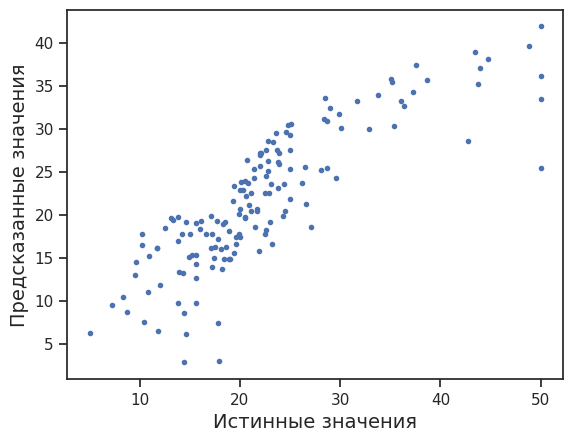

In [ ]:
plt.scatter(y_test, y_test_pred, marker=".")
plt.xlabel("Истинные значения", fontsize=14)
plt.ylabel("Предсказанные значения", fontsize=14)
plt.show()

Сразу измерим метрики качества:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_true=y_train, y_pred=y_train_pred)

21.024239146904783

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

25.34791337530512

In [ ]:
mean_absolute_error(y_true=y_train, y_pred=y_train_pred)

3.2198537503995617

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

3.719902906135511

### Плюсы и минусы линейной регрессии

**Плюсы**:
* Простота модели
* Очень быстрое обучение
* Хорошая интерпретируемость (для нормализованных данных больший по модулю коэффициент ~ значимый признак)
* На вход можно подавать более сложные признаки

**Минусы**:
* Модель неспособна описать более сложные нелинейные зависимости предсказываемой переменной от признаков

### Логистическая регрессия

Логистическая регрессия, несотря на свое название, **используется в задаче классификации** (которая сводится к задаче регрессии).

В случае с одним признаком, вместо того, чтобы осуществлять "подгон" прямой, **осуществляется настройка логистической функции** (сигмоиды).

![sigmoid.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/sigmoid.png)

Формула сигмоиды (для многомерного случая):

$$\sigma(z) = \dfrac{1}{1 + e^{-z}}$$

$$z(x) = \alpha + \beta_1 \cdot x_1 + ... + \beta_n \cdot x_n$$

Загрузим данные для классификации и попробуем обучить логистическую модель:

In [ ]:
import sklearn.datasets

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

Обучим модель:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Получим **предсказание**:

In [ ]:
y_train_pred = logreg.predict(X_train)

In [ ]:
y_test_pred = logreg.predict(X_test)
y_test_pred[:30]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test[:30]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1])

Сразу измерим метрики качества:

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       155
           1       0.97      0.98      0.97       243

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



In [ ]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.95      0.96      0.96       114

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



...и основанные на предсказываемой вероятности метрики:

In [ ]:
y_train_proba = logreg.predict_proba(X_train)[:,1]
y_test_proba = logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true=y_train, y_score=y_train_proba)

0.9949289791583699

In [ ]:
roc_auc_score(y_true=y_test, y_score=y_test_proba)

0.9906124961526623

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_true=y_train, y_score=y_train_proba)

0.9964771272913784

In [ ]:
average_precision_score(y_true=y_test, y_score=y_test_proba)

0.995443971910594

Дополнительно можно построить ROC-кривую

In [ ]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thres_train = roc_curve(y_true=y_train, y_score=y_train_proba)
fpr_test, tpr_test, thres_test = roc_curve(y_true=y_test, y_score=y_test_proba)

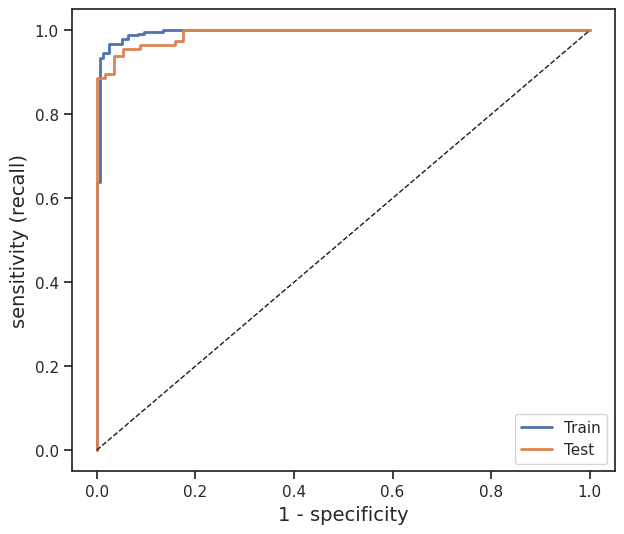

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_train, tpr_train, label="Train", lw=2)
plt.plot(fpr_test, tpr_test, label="Test", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.ylabel("sensitivity (recall)", fontsize=14)
plt.xlabel("1 - specificity", fontsize=14)
plt.legend(); plt.show()

Но как происходит оптимизация параметров модели? В ошибке, которую мы наблюдали выше, было указано, что сходимость не была достигнута.

Чтобы понять, как происходит оптимизация параметров (a.k.a. "подгон"), нужно разобраться с двумя дополнительными вещами.

## Функция потерь, градиентный спуск

При "подгоне" (fitting) самой модели происходит приблизительно следующее:

![training_gif.gif](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/img/training_gif.gif)

Сама модель на картинке описывается формулой: $y = a + b \cdot x$

Ее параметры итеративно меняются от $a = 0, b = 0$ до $ a \approx 1, b \approx 2.2$

Каким образом оптимизатор (компьютер) узнает, в какую сторону ему нужно изменять параметры?

### Функция потерь (функция ошибки, loss function)

Для того, чтобы все это уметь, на каждом шаге (итерации) оптимизатору необходимо понимать, насколько сильно модель ошибается (т.е. насколько ее предсказания отличаются от значений тренировочной выборки).

В качестве функции ошибки для линейной регрессии можно использовать метрику качества MSE или MAE.

На самом деле, можно использовать любую другую метрику, значение которой тем меньше, чем параметры модели ближе к оптимальному описанию данных. И оптимизация модели будет работать, но, возможно, не так хорошо.

MSE и MAE гарантированно являются наилучшими из возможных функций потерь (для линейной регрессии, по методу максимального правдоподобия), если случайная шумовая компонента ($\epsilon$) распределена нормально (MSE) или по Лапласу (MAE) соответственно.

![training_gif_2.gif](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/img/training_gif_2.gif)

Как мы видим, для получения хороших параметров нужна **минимизация функции потерь**. Обратим внимание: при оптимизании нам важно, что **функция ошибки зависит от параметров модели** (коэффициентов), которые мы можем изменять; данные же остаются фиксированными (в простом случае).

Чтобы понять, в какую сторону нужно менять параметры, используется **подсчет градиента функции ошибки**.

**Что такое градиент?**

Простыми словами, градиент - это вектор ($\nabla$), направленный в сторону наиболее быстрого роста функции. Соответственно, направление ($-\nabla$) соответствует направлению максимального уменьшения функции.

Более сложно, градиент - это **набор частных производных** целевой функции. Для нас важно то, что **направление вектора градиента ($\nabla$) совпадает с направлением максимального роста функции**.

Соответственно, оптимизация градиентным спуском - это изменение параметров модели в сторону, противоположную градиенту функции ошибок.

![gradient_desc.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/gradient_desc.png)

### Регуляризация

Даже модель регрессии может переобучаться (хоть и редко)

Попробовав несколько моделей регрессии, вы можете заметить, что иногда проявляются такие проблемы:

* Коэффициенты при **линейно зависимых признаках** могут быть не всегда вменяемые (частный случай - огромные противоположные коэффициенты).

* Когда **признаков очень много** (количество, сравнимое с числом точек), модель старается использовать как можно большее их число с очень маленькими весами.

Все это - проявления переобучения, возникающие из-за избыточной сложности модели.

Однако, казалось бы, модель достаточно простая. Для решения этих проблем **информация вносится не в саму модель, а в ее функцию ошибок**.

#### Регуляризация L2 (Ridge)

L2 нужно применять когда мы думаем что есть зависимые признаки.

К функции ошибок (MSE) добавляется дополнительный член: $$\lambda \sum_{i=1}^{N}\beta_i^2$$

Такая регуляризация накладывает **штраф за очень высокие коэффициенты**. Штраф тем выше, чем больше коэффициент.

Загрузим данные для регрессии

In [ ]:
import sklearn.datasets

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
y = boston.values[1::2, 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

**Обучим модель**:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
linreg_norm = LinearRegression()
linreg_l2 = Ridge()
linreg_norm.fit(X_train, y_train)
linreg_l2.fit(X_train, y_train)

Ridge()

In [ ]:
y_train_pred_norm = linreg_norm.predict(X_train)
y_train_pred_l2 = linreg_l2.predict(X_train)

In [ ]:
y_test_pred_norm = linreg_norm.predict(X_test)
y_test_pred_l2 = linreg_l2.predict(X_test)

Посмотрим на коэффициенты:

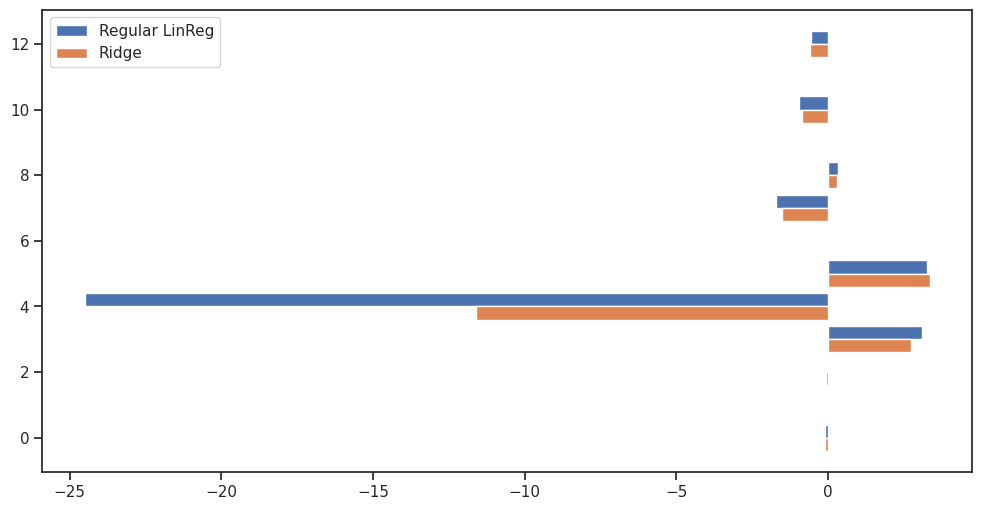

In [ ]:
bar_w = 0.4
br1 = np.arange(linreg_norm.coef_.shape[0]) + bar_w / 2
br2 = br1 - bar_w

plt.figure(figsize=(12, 6))
plt.barh(br1, linreg_norm.coef_, height=bar_w, label="Regular LinReg")
plt.barh(br2, linreg_l2.coef_, height=bar_w, label="Ridge")
plt.legend()

В среднем значения коэффициентов стали меньше при L2 - регуляризации. Качество модели на train упало не очень сильно.

И посмотрим на метрики:

In [ ]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred_norm)

21.024239146904783

In [ ]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred_l2)

21.449942700899093

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred_norm)

25.347913375305467

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred_l2)

23.98264536606

Качество на тренировочной выборке немного ухудшилось, но зато наблюдаем лучшее качество на тестовой выборке. То есть мы добились улучшения описания нашей моделью рееальной зависимости.

Регуляризация L2 **помогает справиться с неадекватно большими коэффициентами** при наличии линейно зависимых или коррелирующих признаков.

#### Регуляризация L1 (Lasso)

L1 нужно применять когда очень много фичей. Она занулит ненужные.

К функции ошибок (MSE) добавляется дополнительный член: $$\lambda \sum_{i=1}^{N}|\beta_i|$$

Регуляризация L1 накладывает **штраф за ненулевые коэффициенты**. Штраф не зависит от величины коэффициента.

Почему накладывается штраф за ненулевые коэффициенты? Давайте попробуем посмотреть на градиент функции ошибок по весам $\beta_i$.

$$\nabla = ||\dfrac{\partial}{\partial\beta_i}L||_i = ||\lambda \sum_{j=1}^N \dfrac{\partial}{\partial\beta_i}\beta_j||_i = ||\lambda||_i$$

**Обучим модель**:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [ ]:
linreg_norm = LinearRegression()
linreg_l1 = Lasso()
linreg_norm.fit(X_train, y_train)
linreg_l1.fit(X_train, y_train)

Lasso()

In [ ]:
y_train_pred_norm = linreg_norm.predict(X_train)
y_train_pred_l1 = linreg_l1.predict(X_train)

In [ ]:
y_test_pred_norm = linreg_norm.predict(X_test)
y_test_pred_l1 = linreg_l1.predict(X_test)

Посмотрим на коэффициенты:

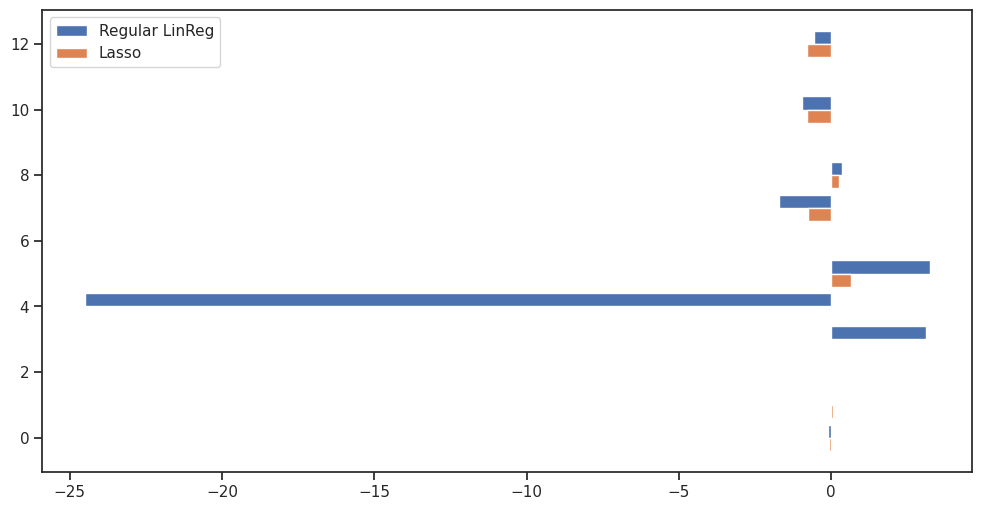

In [ ]:
bar_w = 0.4
br1 = np.arange(linreg_norm.coef_.shape[0]) + bar_w / 2
br2 = br1 - bar_w

plt.figure(figsize=(12, 6))
plt.barh(br1, linreg_norm.coef_, height=bar_w, label="Regular LinReg")
plt.barh(br2, linreg_l1.coef_, height=bar_w, label="Lasso")
plt.legend()

И посмотрим на метрики:

In [ ]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred_norm)

21.024239146904783

In [ ]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred_l1)

26.523231628518914

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred_norm)

25.347913375305467

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred_l1)

28.96307488731976

Качество сильно ухудшилось на тренировочной и тестовой выборках.

Регуляризация L1 **помогает справиться со множеством мелких ненулевых (нерелевантных) коэффициентов** при наличии достаточно большого количества признаков.

## Заключение

* В обучении с учителем есть 2 основные задачи: **задача классификации и задача регрессии**

* Самые простые **модели для задачи классификации** - это **k-NN и логистическая регрессия**

* Самые простые **модели для задачи регрессии** - это **k-NN и линейная регрессия**

* Для оценки качества используют много метрик. Важно знать:
  * Для задачи классификации: **accuracy, F1, AUC ROC**
  * Для задачи регрессии: **MSE, MAE, R$^2$**

* Оптимизация параметров модели (если их нужно оптимизировать) чаще всего осуществляется с помощью **градиентного спуска по функции ошибок**.

* Регуляризация помогает бороться с переобучением модели путем **добавления заранее известной информации о поведении параметров**. Для линейной и логистической регрессий используют 2 вида регуляризации:
  * **L1 регуляризация** штрафует модель за **наличие ненулевых коэффициентов** (предполагаем, что важно небольшое количество признаков)
  * **L2 регуляризация** штрафует модель за **абсолютную величину коэффициентов** (предполагаем, что нет признаков с крайне высоким весом в оценке)

В результате L2 многие коэффициенты станнут ближе к 0.

В результате L1 могут занулиться некоторые коэффициенты.